# Stock Price forecasting

## Setup

In [15]:
import os
from datetime import datetime
import yfinance as yf

import IPython
import IPython.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/all_stocks_5yr.csv"

In [4]:
now_time = datetime.now()
start_date = datetime(now_time.year - 5, now_time.month , now_time.day)
end_date = datetime(now_time.year , now_time.month , now_time.day)

# Define the ticker list
tickers_list = ['MMM','ABT','ABBV','ACN','ATVI','AYI','ADBE','AMD','AAP','AES','AET',
		'AMG','AFL','A','APD','AKAM','ALK','ALB','ARE','ALXN','ALGN','ALLE',
		'AGN','ADS','LNT','ALL','GOOGL','GOOG','MO','AMZN','AEE','AAL','AEP',
		'AXP','AIG','AMT','AWK','AMP','ABC','AME','AMGN','APH','APC','ADI','ANDV',
		'ANSS','ANTM','AON','AOS','APA','AIV','AAPL','AMAT','APTV','ADM','ARNC',
		'AJG','AIZ','T','ADSK','ADP','AZO','AVB','AVY','BHGE','BLL','BAC','BK',
		'BAX','BBT','BDX','BRK.B','BBY','BIIB','BLK','HRB','BA','BWA','BXP','BSX',
		'BHF','BMY','AVGO','BF.B','CHRW','CA','COG','CDNS','CPB','COF','CAH','CBOE',
		'KMX','CCL','CAT','CBG','CBS','CELG','CNC','CNP','CTL','CERN','CF','SCHW',
		'CHTR','CHK','CVX','CMG','CB','CHD','CI','XEC','CINF','CTAS','CSCO','C','CFG',
		'CTXS','CLX','CME','CMS','KO','CTSH','CL','CMCSA','CMA','CAG','CXO','COP',
		'ED','STZ','COO','GLW','COST','COTY','CCI','CSRA','CSX','CMI','CVS','DHI',
		'DHR','DRI','DVA','DE','DAL','XRAY','DVN','DLR','DFS','DISCA','DISCK','DISH',
		'DG','DLTR','D','DOV','DWDP','DPS','DTE','DRE','DUK','DXC','ETFC','EMN','ETN',
		'EBAY','ECL','EIX','EW','EA','EMR','ETR','EVHC','EOG','EQT','EFX','EQIX','EQR',
		'ESS','EL','ES','RE','EXC','EXPE','EXPD','ESRX','EXR','XOM','FFIV','FB','FAST',
		'FRT','FDX','FIS','FITB','FE','FISV','FLIR','FLS','FLR','FMC','FL','F','FTV',
		'FBHS','BEN','FCX','GPS','GRMN','IT','GD','GE','GGP','GIS','GM','GPC','GILD',
		'GPN','GS','GT','GWW','HAL','HBI','HOG','HRS','HIG','HAS','HCA','HCP','HP','HSIC',
		'HSY','HES','HPE','HLT','HOLX','HD','HON','HRL','HST','HPQ','HUM','HBAN','HII',
		'IDXX','INFO','ITW','ILMN','IR','INTC','ICE','IBM','INCY','IP','IPG','IFF','INTU',
		'ISRG','IVZ','IQV','IRM','JEC','JBHT','SJM','JNJ','JCI','JPM','JNPR','KSU','K','KEY',
		'KMB','KIM','KMI','KLAC','KSS','KHC','KR','LB','LLL','LH','LRCX','LEG','LEN','LUK',
		'LLY','LNC','LKQ','LMT','L','LOW','LYB','MTB','MAC','M','MRO','MPC','MAR','MMC','MLM',
		'MAS','MA','MAT','MKC','MCD','MCK','MDT','MRK','MET','MTD','MGM','KORS','MCHP','MU',
		'MSFT','MAA','MHK','TAP','MDLZ','MON','MNST','MCO','MS','MOS','MSI','MYL','NDAQ',
		'NOV','NAVI','NTAP','NFLX','NWL','NFX','NEM','NWSA','NWS','NEE','NLSN','NKE','NI',
		'NBL','JWN','NSC','NTRS','NOC','NCLH','NRG','NUE','NVDA','ORLY','OXY','OMC','OKE',
		'ORCL','PCAR','PKG','PH','PDCO','PAYX','PYPL','PNR','PBCT','PEP','PKI','PRGO','PFE',
		'PCG','PM','PSX','PNW','PXD','PNC','RL','PPG','PPL','PX','PCLN','PFG','PG','PGR',
		'PLD','PRU','PEG','PSA','PHM','PVH','QRVO','PWR','QCOM','DGX','RRC','RJF','RTN','O',
		'RHT','REG','REGN','RF','RSG','RMD','RHI','ROK','COL','ROP','ROST','RCL','CRM','SBAC',
		'SCG','SLB','SNI','STX','SEE','SRE','SHW','SIG','SPG','SWKS','SLG','SNA','SO','LUV',
		'SPGI','SWK','SBUX','STT','SRCL','SYK','STI','SYMC','SYF','SNPS','SYY','TROW','TPR',
		'TGT','TEL','FTI','TXN','TXT','TMO','TIF','TWX','TJX','TMK','TSS','TSCO','TDG','TRV',
		'TRIP','FOXA','FOX','TSN','UDR','ULTA','USB','UAA','UA','UNP','UAL','UNH','UPS','URI',
		'UTX','UHS','UNM','VFC','VLO','VAR','VTR','VRSN','VRSK','VZ','VRTX','VIAB','V','VNO',
		'VMC','WMT','WBA','DIS','WM','WAT','WEC','WFC','HCN','WDC','WU','WRK','WY','WHR','WMB',
		'WLTW','WYN','WYNN','XEL','XRX','XLNX','XL','XYL','YUM','ZBH','ZION','ZTS']
bad_names = []

df = pd.DataFrame()

if not os.path.exists(DATA_PATH):
    for ticker in tickers_list:
        data = yf.download(ticker, start_date, end_date)
        IPython.display.clear_output()
        if data.empty:
            bad_names.append(ticker)
            print('bad: %s' % (ticker))
        data['Name'] = ticker
        df = pd.concat([df, data], axis=0)


    df.to_csv(DATA_PATH)

else:
    df = pd.read_csv(DATA_PATH)

## Data analysis and visualizations

In [ ]:
df.head()

Date        Open        High         Low       Close   Adj Close  \
0  2019-04-22  181.688965  183.444809  181.663879  182.725754  141.974060   
1  2019-04-23  182.282608  183.570236  181.588623  183.528427  142.597717   
2  2019-04-24  183.110367  183.737457  182.357864  183.177261  142.324875   
3  2019-04-25  165.167221  166.354507  158.528427  159.464890  123.900848   
4  2019-04-26  159.306015  160.744141  158.327759  160.259201  124.518005   

       Volume Name  
0   1678586.0  MMM  
1   1867913.0  MMM  
2   2450484.0  MMM  
3  17516855.0  MMM  
4   5371595.0  MMM

In [ ]:
# unique stocks
print("Uniques stocks available in dataset:", df['Name'].nunique())

Uniques stocks available in dataset: 433


In [ ]:
# metadata of dataset
print("Metadata of the dataset:\n")
df.info()

Metadata of the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539562 entries, 0 to 539561
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       539562 non-null  object 
 1   Open       539562 non-null  float64
 2   High       539562 non-null  float64
 3   Low        539562 non-null  float64
 4   Close      539562 non-null  float64
 5   Adj Close  539562 non-null  float64
 6   Volume     539562 non-null  float64
 7   Name       539562 non-null  object 
dtypes: float64(6), object(2)
memory usage: 32.9+ MB


In [ ]:
# missing values
null = df.isnull().sum()
print(null)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Name         0
dtype: int64


In [ ]:
new_df = df.copy()
new_df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d',)



# new dataframe info
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539562 entries, 0 to 539561
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       539562 non-null  datetime64[ns]
 1   Open       539562 non-null  float64       
 2   High       539562 non-null  float64       
 3   Low        539562 non-null  float64       
 4   Close      539562 non-null  float64       
 5   Adj Close  539562 non-null  float64       
 6   Volume     539562 non-null  float64       
 7   Name       539562 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 32.9+ MB


In [ ]:
# max range of stocks dataset
delta = (new_df.Date.max() - new_df.Date.min())
print("Time range of stocks dataset:\n", delta)

Time range of stocks dataset:
 1824 days 00:00:00


### Top 10 stock tickers by average trade volume

In [ ]:
# stock_value=df.groupby('Nmae').agg({'Volume':pd.Series.sum})
stock_value = new_df[['Name', 'Volume']].groupby('Name').mean().sort_values('Volume', ascending=True)[:10]
stock_value.head(10)

Volume
Name               
CA      6573.809524
COL    40417.705736
MTD   134558.617951
AZO   198575.377284
PX    306791.866029
GWW   311094.757744
HII   334419.777601
TDG   335584.273233
CMG   341600.397141
AMG   364002.382844

In [ ]:
fig = px.bar(y=stock_value.index, x=stock_value.Volume,
             orientation='h', title='Top 10 stock tickers by average trade volume')
fig.update_layout(xaxis_title='Volume', yaxis_title='Stock Name')
fig.show()

## Closing stock price visualizations

In [ ]:
for name in stock_value.index:
    exec(f'{name}_df = new_df[new_df["Name"] == "{name}"]')

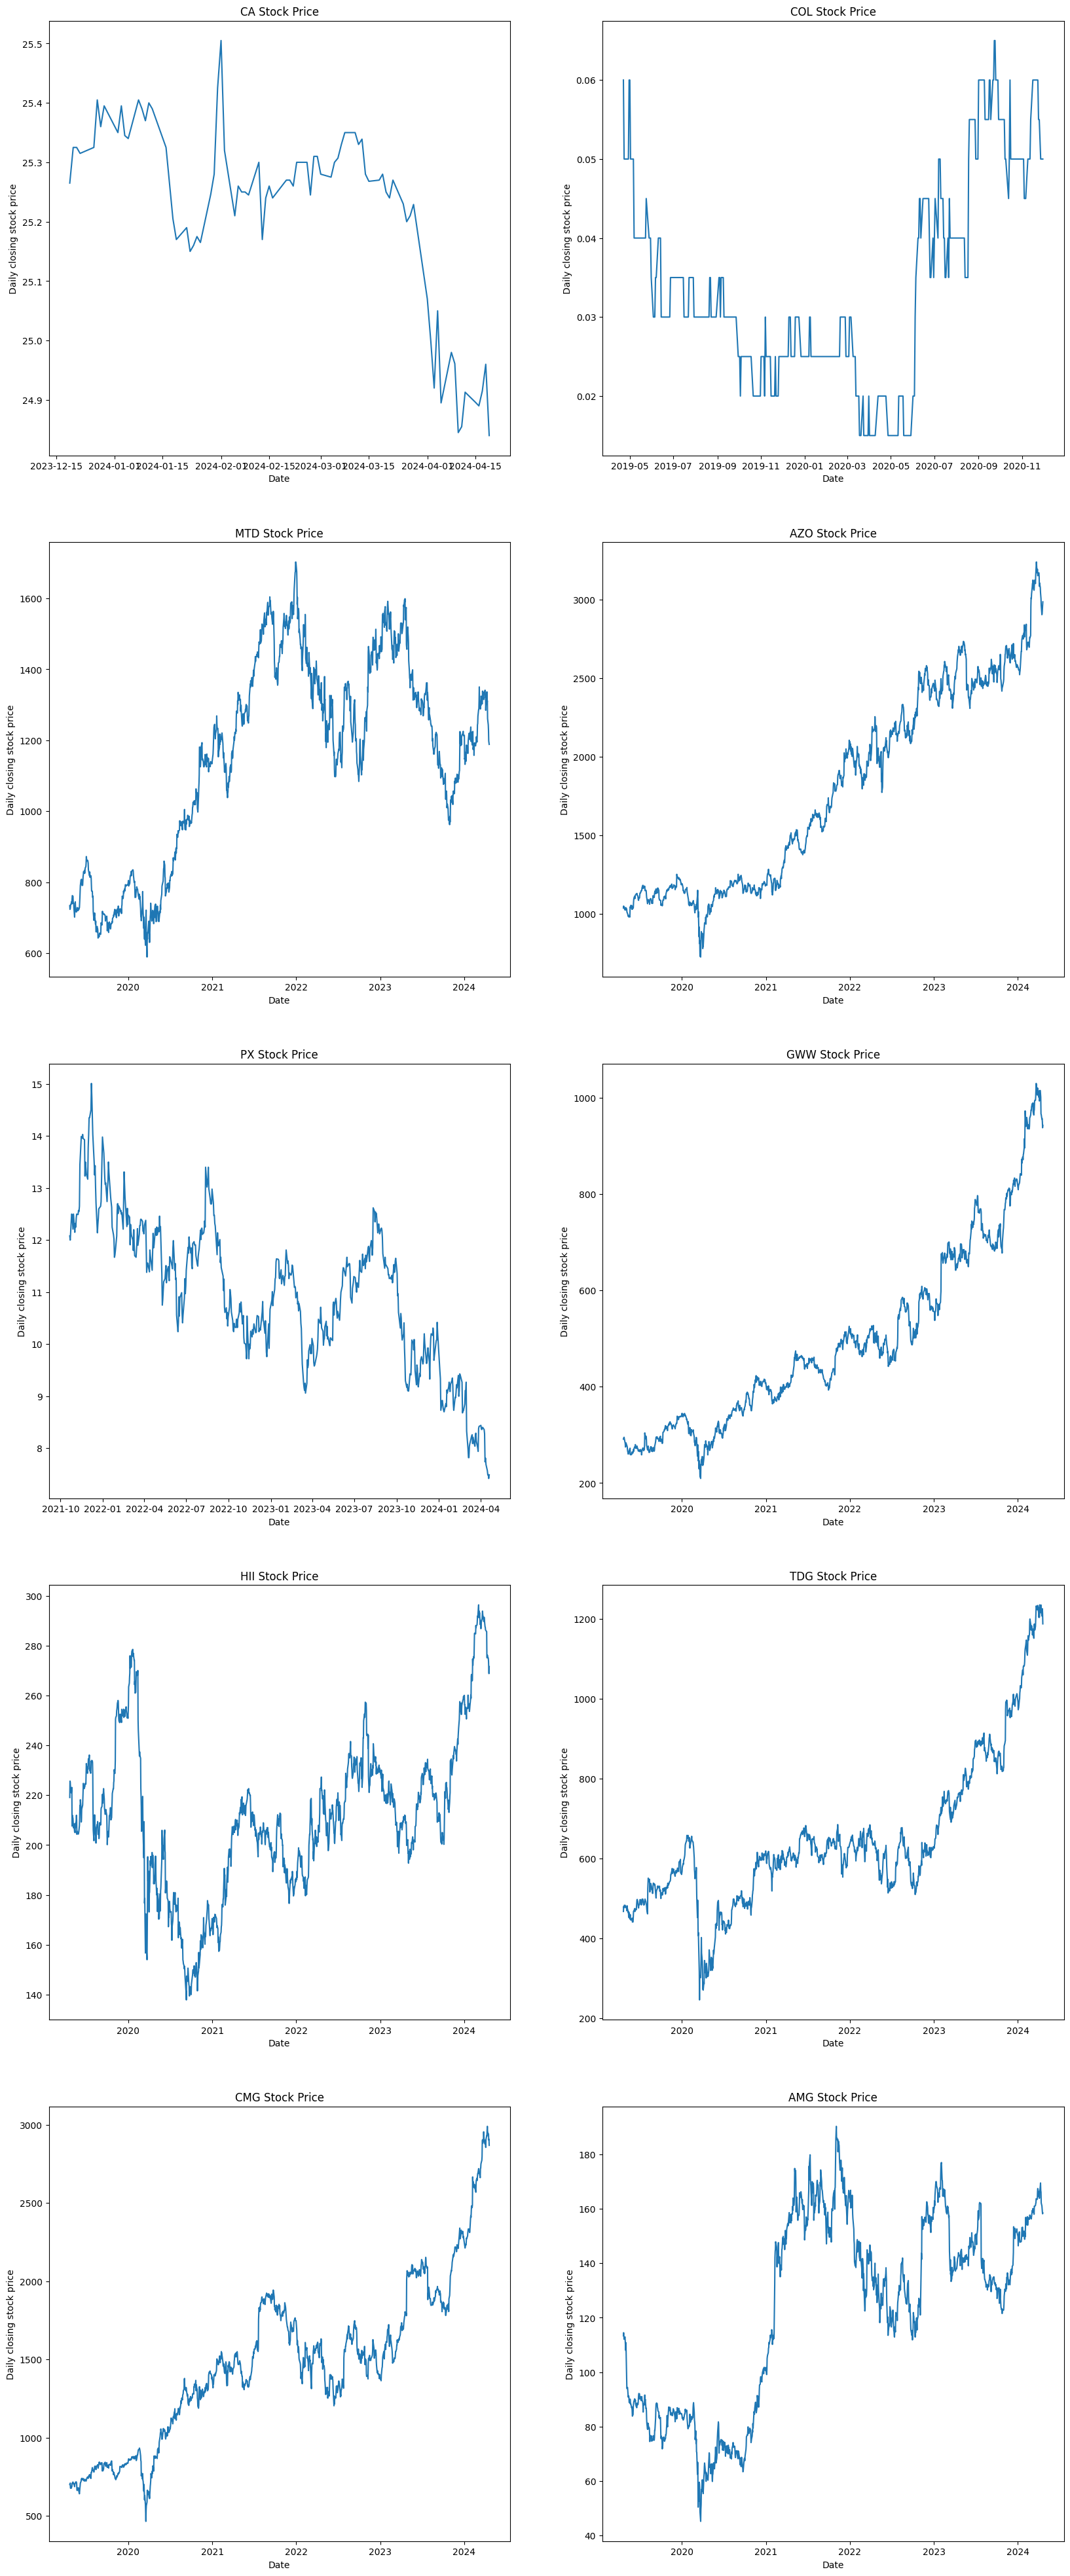

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(20, 50))

for i, name in enumerate(stock_value.index[:10]):
    sub_df = new_df[new_df["Name"] == name]
    ax = axes[i // 2, i % 2]
    ax.plot(sub_df['Date'], sub_df['Close'])
    ax.set_title(f'{name} Stock Price')
    ax.set_ylabel("Daily closing stock price")
    ax.set_xlabel("Date")

## Trade volume of stocks over a period of 2013-2018

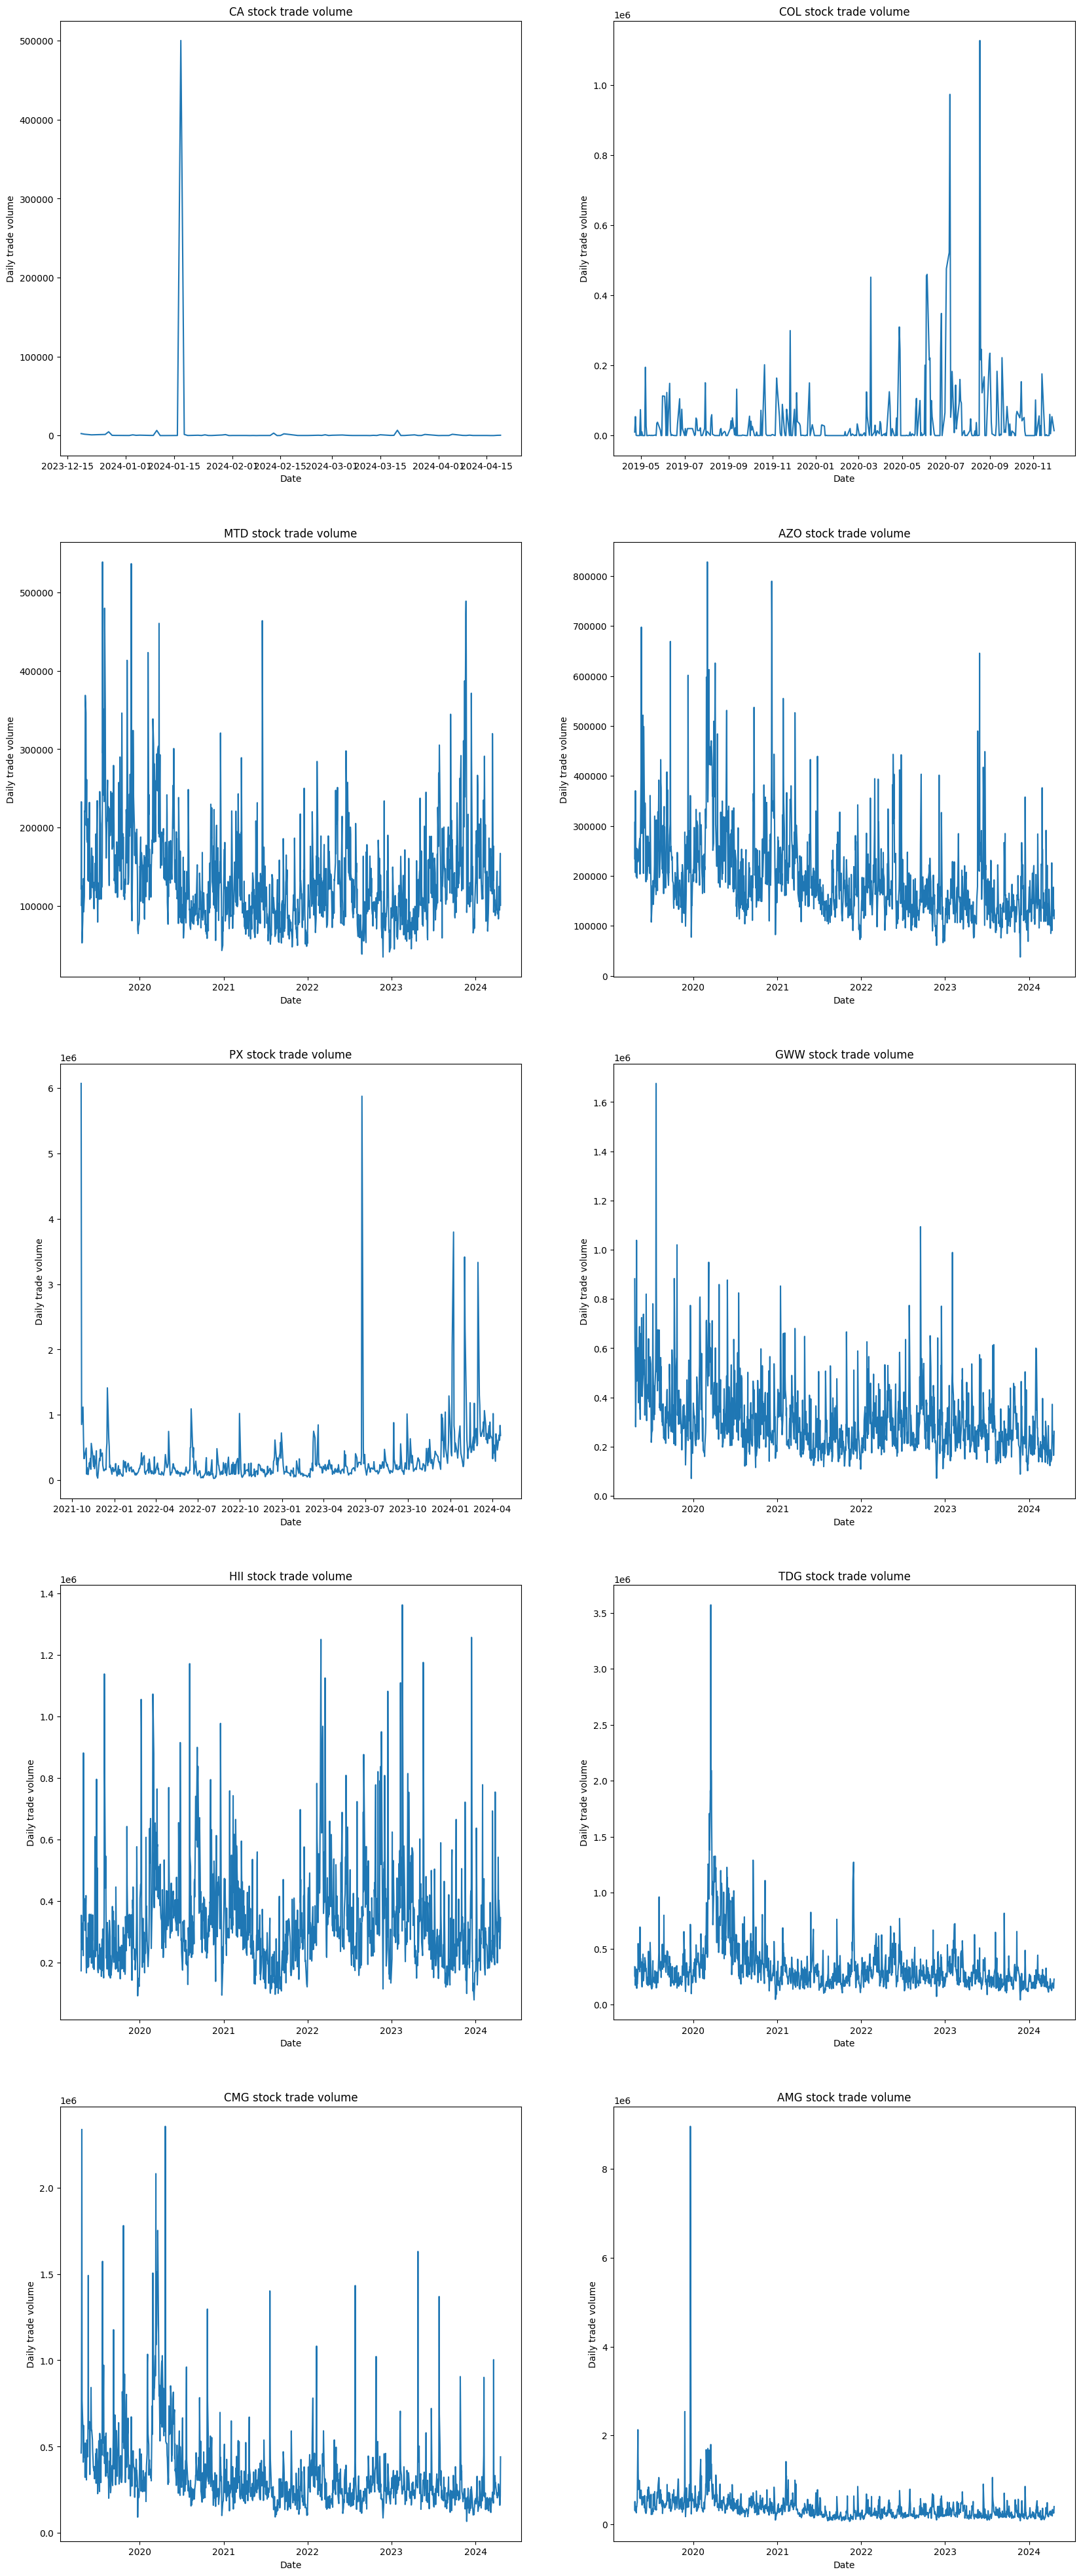

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(20, 50))

for i, name in enumerate(stock_value.index[:10]):
    sub_df = new_df[new_df["Name"] == name]
    ax = axes[i // 2, i % 2]
    ax.plot(sub_df['Date'], sub_df['Volume'],)
    ax.set_title(f"{name} stock trade volume")
    ax.set_ylabel("Daily trade volume")
    ax.set_xlabel("Date")


## Comparative analysis of 7 tech stocks

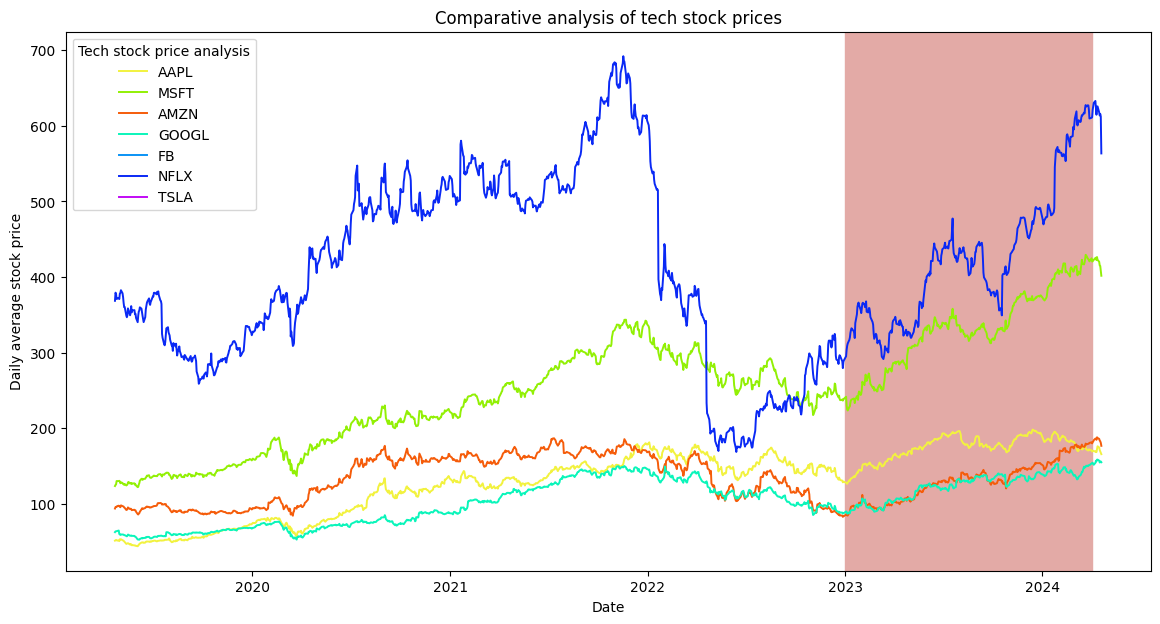

In [ ]:
new_df['daily_return'] = ((new_df['Close'] - new_df['Open'])/new_df['Open'])*100
new_df['daily_mean'] = (new_df['Open'] + new_df['Close'] + new_df['High'] + new_df['Low'])/4

teck_companies = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'FB', 'NFLX', 'TSLA']
colors = ['#f2f23f', '#92f005', '#f55c0a', '#0af5ba', '#0a93f5', '#0a29f5', '#c20af5']

fig, ax = plt.subplots(figsize=(14,7))

for i, name in enumerate(teck_companies):
    sub_df = new_df[new_df["Name"] == name]
    ax.plot(sub_df['Date'], sub_df['daily_mean'], label=name, color=colors[i], lw=1.4)
ax.axvspan(*mdates.datestr2num(['01/01/2023','04/01/2024']), color='#e3aaa6')
ax.set_title("Comparative analysis of tech stock prices")
ax.set_xlabel("Date")
ax.set_ylabel("Daily average stock price")
ax.legend(title="Tech stock price analysis")

plt.show()

## growth of stocks of the companies over a 5 years period

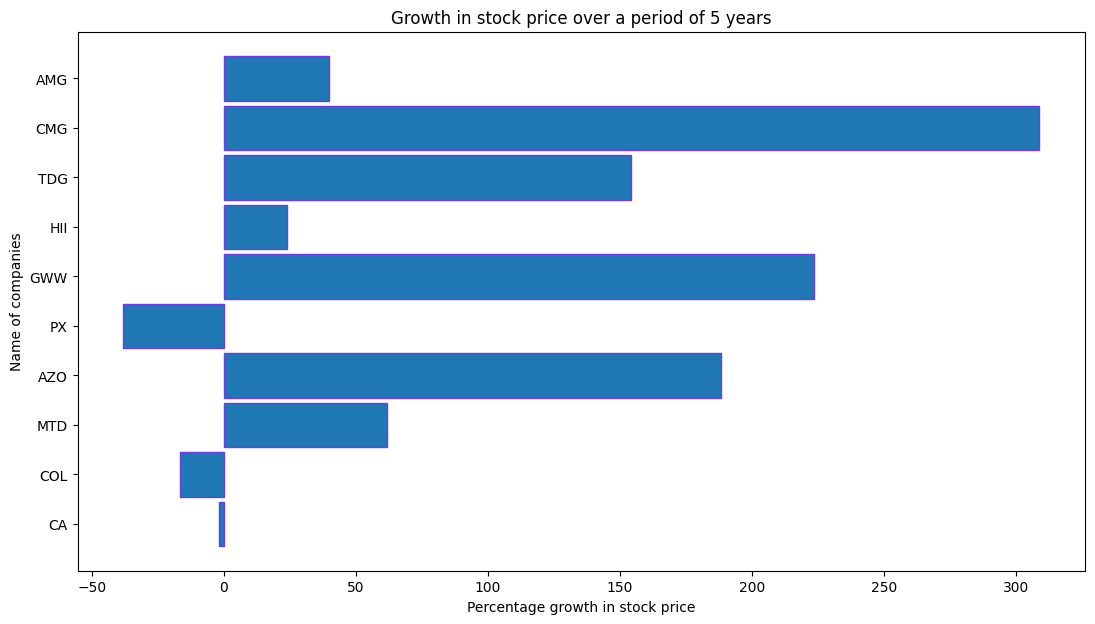

In [ ]:
mini = []
maxi = []

for name in stock_value.index:
    sub_df = new_df[new_df["Name"] == name]
    mini.append(sub_df[sub_df['Date'] == sub_df['Date'].min()]['Close'].values[0])
    maxi.append(sub_df[sub_df['Date'] == sub_df['Date'].max()]['Close'].values[0])

diff = np.array(maxi) - np.array(mini)
growth = (diff/mini)*100
growth = pd.Series(growth, index=stock_value.index)
growth.head()

fig, ax = plt.subplots(figsize=(13,7))
ax.barh(y=growth.index, width=growth, height=0.9, edgecolor='#713ae8')
ax.set_xlabel('Percentage growth in stock price')
ax.set_ylabel('Name of companies')
ax.set_title("Growth in stock price over a period of 5 years")
plt.show()

## Daily return of stock prices analysis

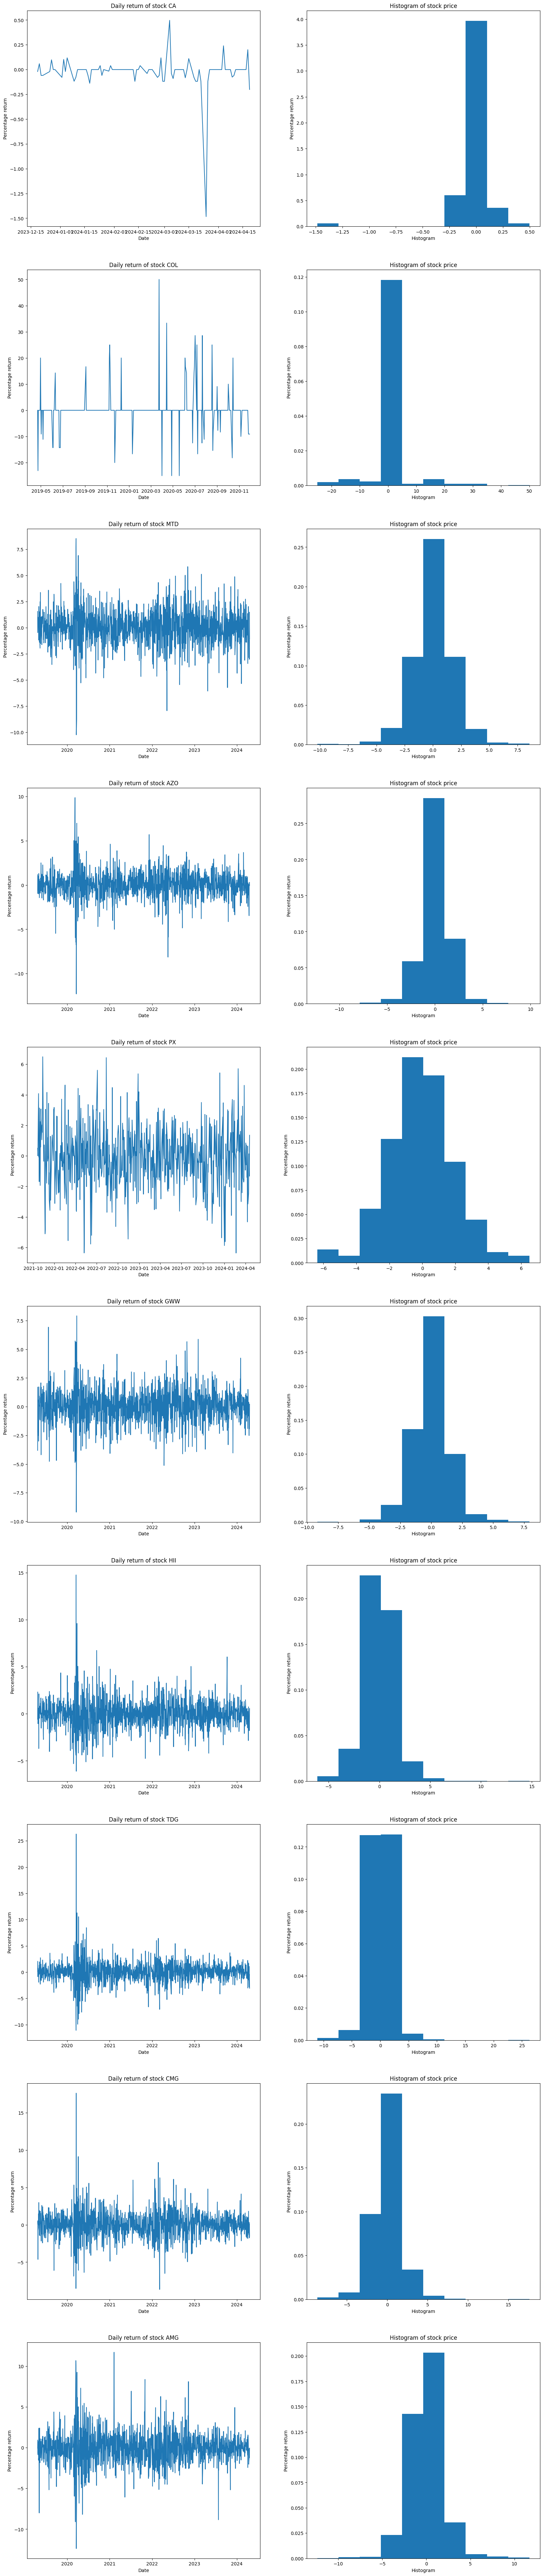

In [ ]:
plt.figure(figsize=(20,100))

for i, name in enumerate(stock_value.index):
    sub_df = new_df[new_df["Name"] == name]
    plt.subplot(10, 2, 2*i+1)
    plt.plot(sub_df['Date'], sub_df['daily_return'])
    plt.xlabel('Date')
    plt.ylabel("Percentage return")
    plt.title(f"Daily return of stock {name}")

    plt.subplot(10, 2, 2*i+2)
    plt.hist(sub_df['daily_return'], density=True,)
    plt.xlabel('Histogram')
    plt.ylabel("Percentage return")
    plt.title(f"Histogram of stock price")

plt.show()



## Moving Averages charts

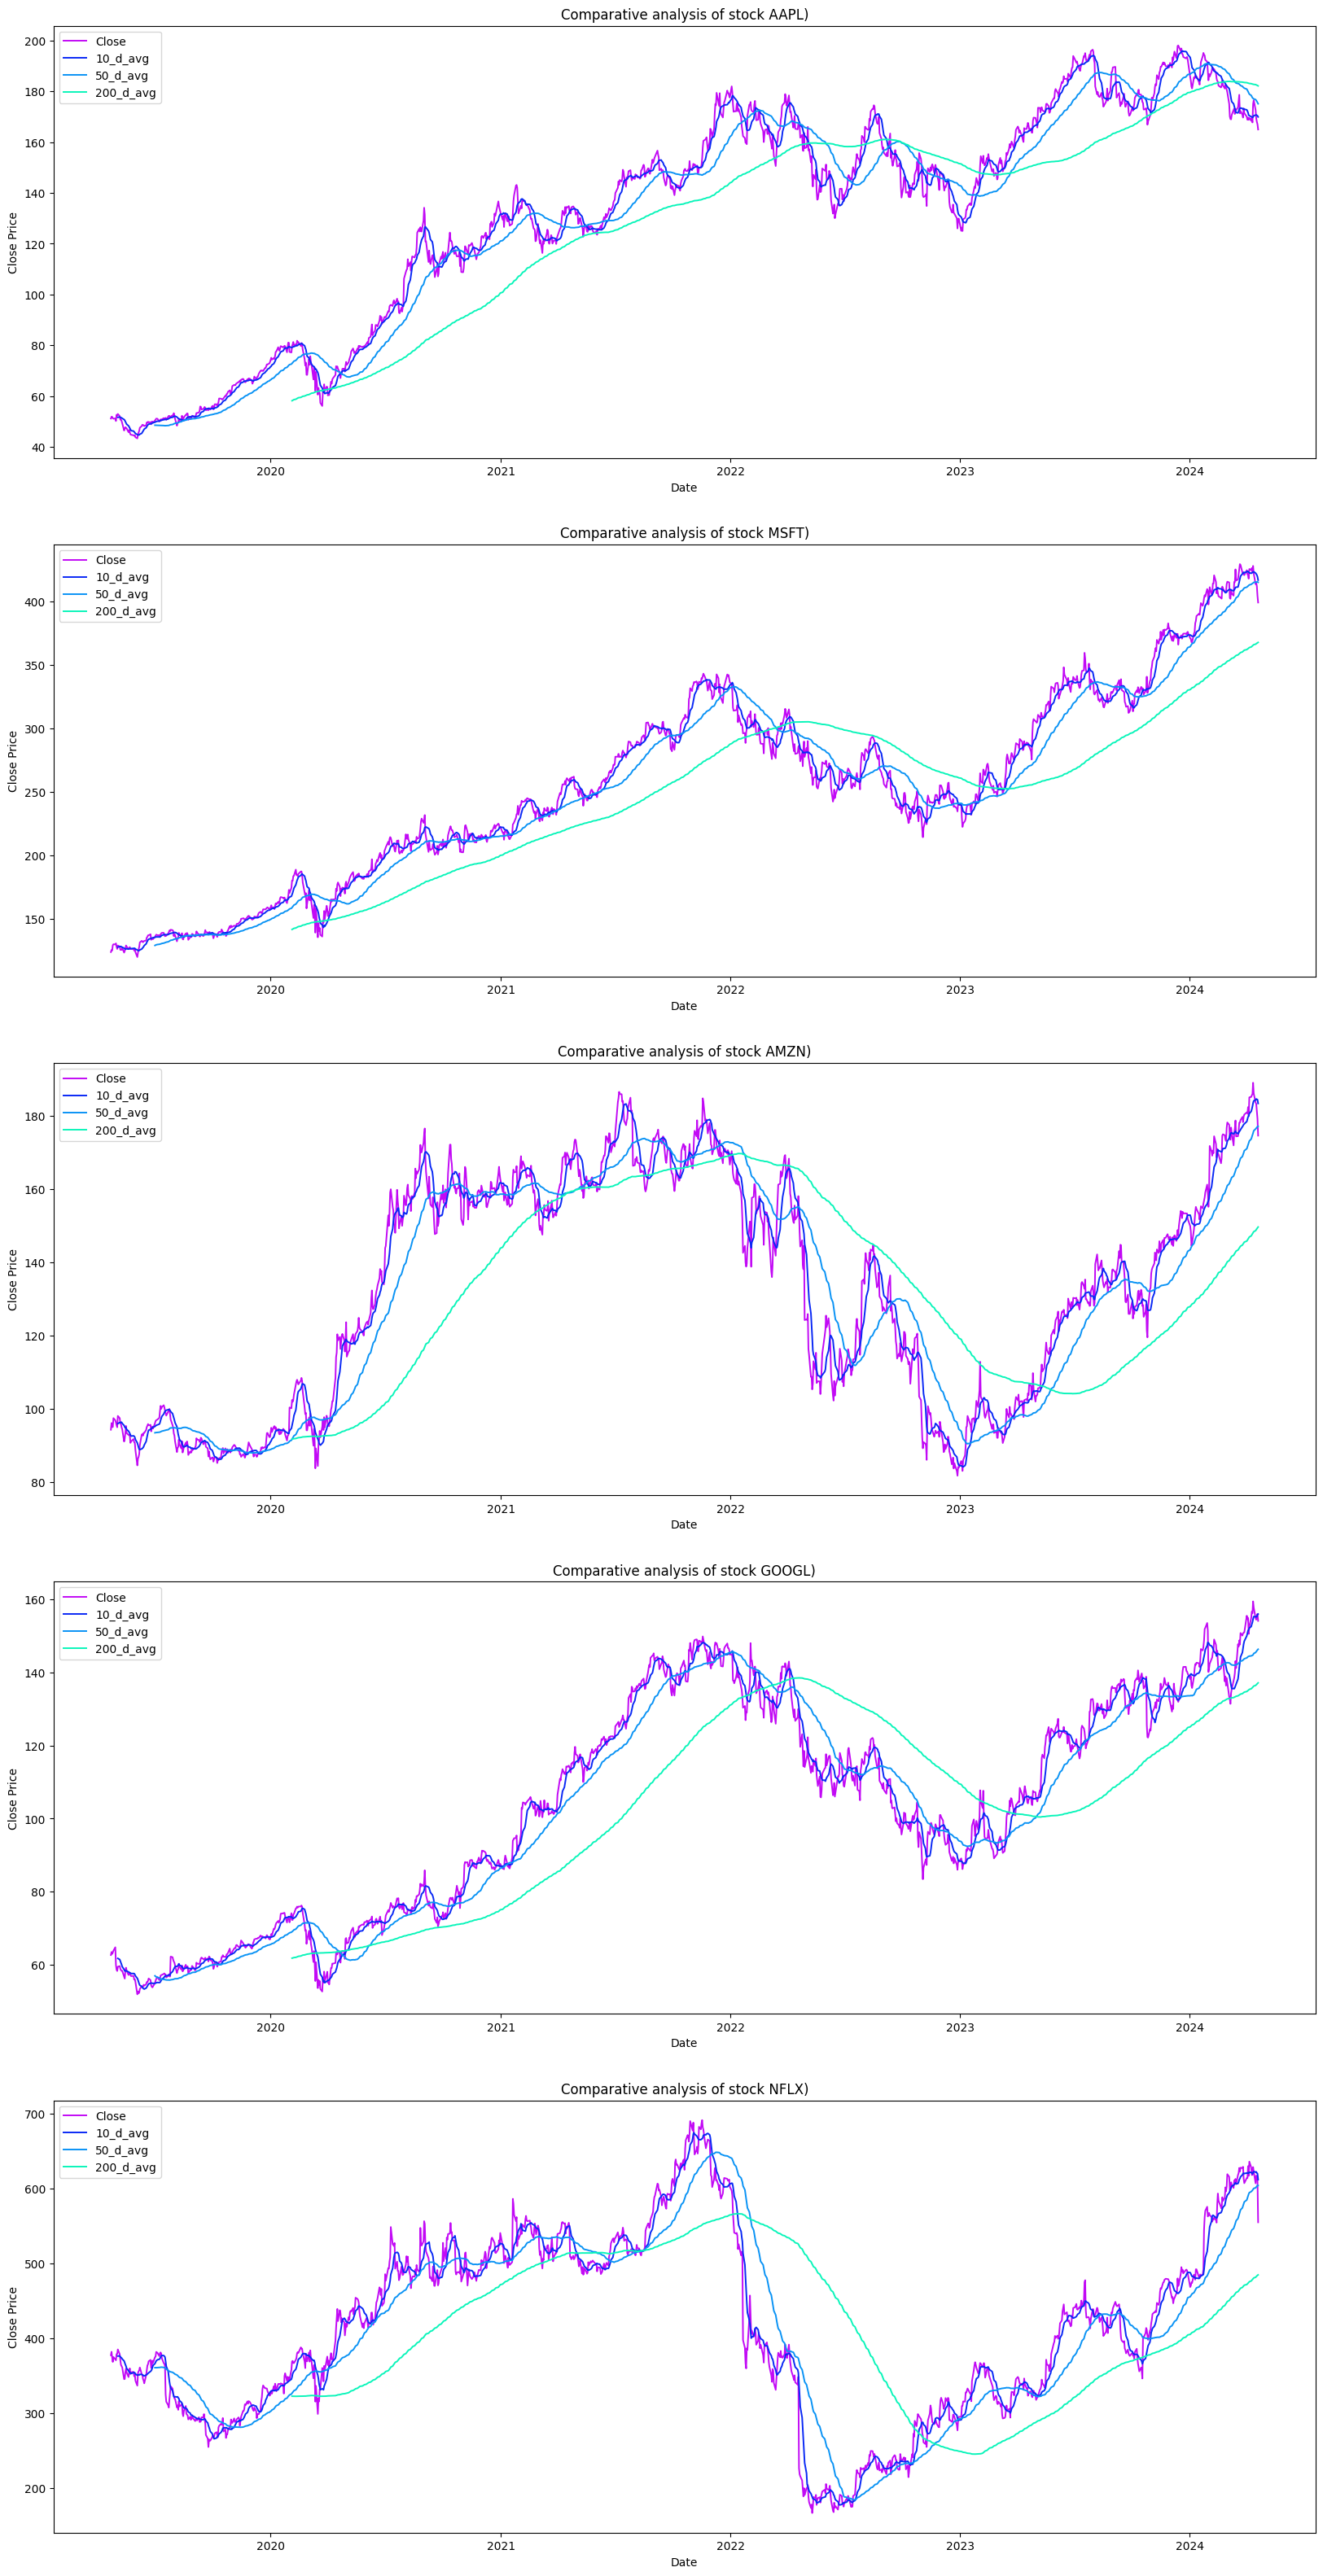

In [ ]:
teck_companies = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'NFLX',]
colors = ['#c20af5', '#0a29f5', '#0a93f5', '#0af5ba',]

plt.figure(figsize=(20,40))

for i, name in enumerate(teck_companies):
    sub_df = new_df[new_df["Name"] == name]
    sub_df['10_d_avg'] = sub_df['Close'].rolling(window=10).mean()
    sub_df['50_d_avg'] = sub_df['Close'].rolling(window=50).mean()
    sub_df['200_d_avg'] = sub_df['Close'].rolling(window=200).mean()

    plt.subplot(5, 1, i+1)
    plt.plot(sub_df['Date'], sub_df['Close'], label='Close', color=colors[0], lw=1.4)
    plt.plot(sub_df['Date'], sub_df['10_d_avg'], label='10_d_avg', color=colors[1], lw=1.4)
    plt.plot(sub_df['Date'], sub_df['50_d_avg'], label='50_d_avg', color=colors[2], lw=1.4)
    plt.plot(sub_df['Date'], sub_df['200_d_avg'], label='200_d_avg', color=colors[3], lw=1.4)
    plt.xlabel('Date')
    plt.ylabel("Close Price")
    plt.title(f"Comparative analysis of stock {name})")
    plt.legend()


plt.show()

# Stock price forecasting: Modelling and forecast

In [18]:
# Google dataframe for forecasting
m_df = df.copy()
g_df = m_df[m_df['Name'] == 'GOOGL']
g_df.drop(['Adj Close', 'Name'], axis=1, inplace=True)
g_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 26439 to 27697
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1259 non-null   object 
 1   Open    1259 non-null   float64
 2   High    1259 non-null   float64
 3   Low     1259 non-null   float64
 4   Close   1259 non-null   float64
 5   Volume  1259 non-null   float64
dtypes: float64(5), object(1)
memory usage: 68.9+ KB


In [19]:
g_df.describe().transpose()

count          mean           std           min           25%  \
Open    1259.0  1.034132e+02  2.985590e+01  5.222450e+01  7.445075e+01   
High    1259.0  1.045977e+02  3.011270e+01  5.250000e+01  7.528225e+01   
Low     1259.0  1.023085e+02  2.957160e+01  5.044350e+01  7.384450e+01   
Close   1259.0  1.034829e+02  2.983952e+01  5.193700e+01  7.437350e+01   
Volume  1259.0  3.359736e+07  1.497628e+07  9.312000e+06  2.418640e+07   

                 50%           75%           max  
Open    1.046990e+02  1.313800e+02  1.588600e+02  
High    1.061220e+02  1.330000e+02  1.602200e+02  
Low     1.038400e+02  1.298353e+02  1.571400e+02  
Close   1.049200e+02  1.314000e+02  1.594100e+02  
Volume  2.986600e+07  3.770900e+07  1.331780e+08

In [20]:
date_time = pd.to_datetime(g_df.pop('Date'), format='%Y-%m-%d')

In [21]:
g_df.head()

Open       High        Low      Close      Volume
26439  61.833500  62.716999  61.668499  62.688000  19084000.0
26440  62.832001  63.721500  62.598499  63.529499  31868000.0
26441  63.529499  63.700001  62.990501  63.002499  23396000.0
26442  63.514999  63.639999  62.900002  63.367001  31344000.0
26443  63.668999  63.945499  63.250000  63.870998  27228000.0

## Feature engineering

### Time

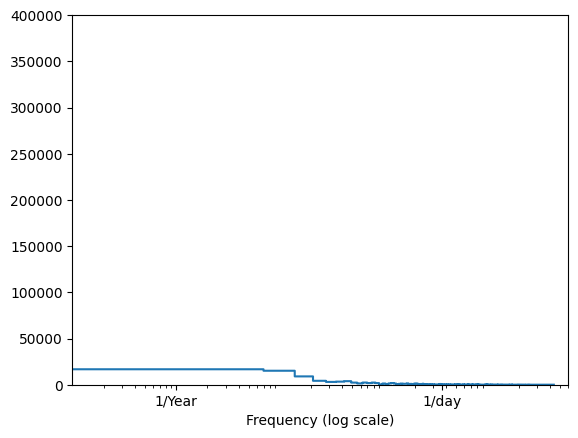

In [22]:
fft = tf.signal.rfft(g_df['Close'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(g_df['Close'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

Text(0.5, 1.0, 'Time of month signal')

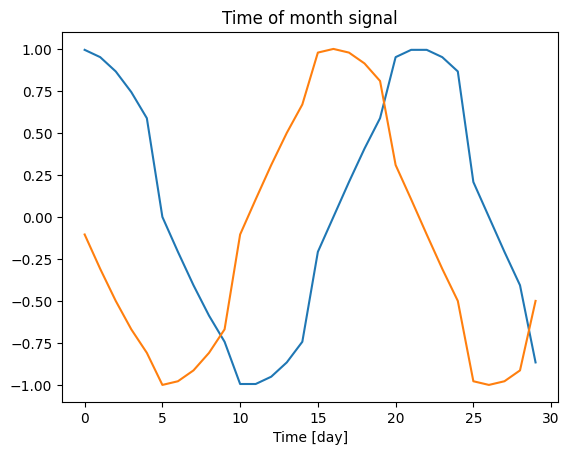

In [23]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

month = 24*60*60*30
year = (365.2425)*24*60*60

g_df['Month_sin'] = np.sin(timestamp_s * (2 * np.pi / month))
g_df['Month_cos'] = np.cos(timestamp_s * (2 * np.pi / month))
g_df['Year_sin'] = np.sin(timestamp_s * (2 * np.pi / year))
g_df['Year_cos'] = np.cos(timestamp_s * (2 * np.pi / year))

plt.plot(np.array(g_df['Month_sin'])[:30])
plt.plot(np.array(g_df['Month_cos'])[:30])
plt.xlabel('Time [day]')
plt.title('Time of month signal')


In [24]:
g_df.head()

Open       High        Low      Close      Volume  Month_sin  \
26439  61.833500  62.716999  61.668499  62.688000  19084000.0   0.994522   
26440  62.832001  63.721500  62.598499  63.529499  31868000.0   0.951057   
26441  63.529499  63.700001  62.990501  63.002499  23396000.0   0.866025   
26442  63.514999  63.639999  62.900002  63.367001  31344000.0   0.743145   
26443  63.668999  63.945499  63.250000  63.870998  27228000.0   0.587785   

       Month_cos  Year_sin  Year_cos  
26439  -0.104528  0.942510 -0.334178  
26440  -0.309017  0.936622 -0.350342  
26441  -0.500000  0.930457 -0.366402  
26442  -0.669131  0.924016 -0.382353  
26443  -0.809017  0.917302 -0.398191

### Split the data

In [25]:
column_indices = {name: i for i, name in enumerate(g_df.columns)}

n = len(g_df)
train_df = g_df[0:int(n*0.7)]
val_df = g_df[int(n*0.7):int(n*0.9)]
test_df = g_df[int(n*0.9):]

num_features = g_df.shape[1]

### Normalize the data

In [26]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

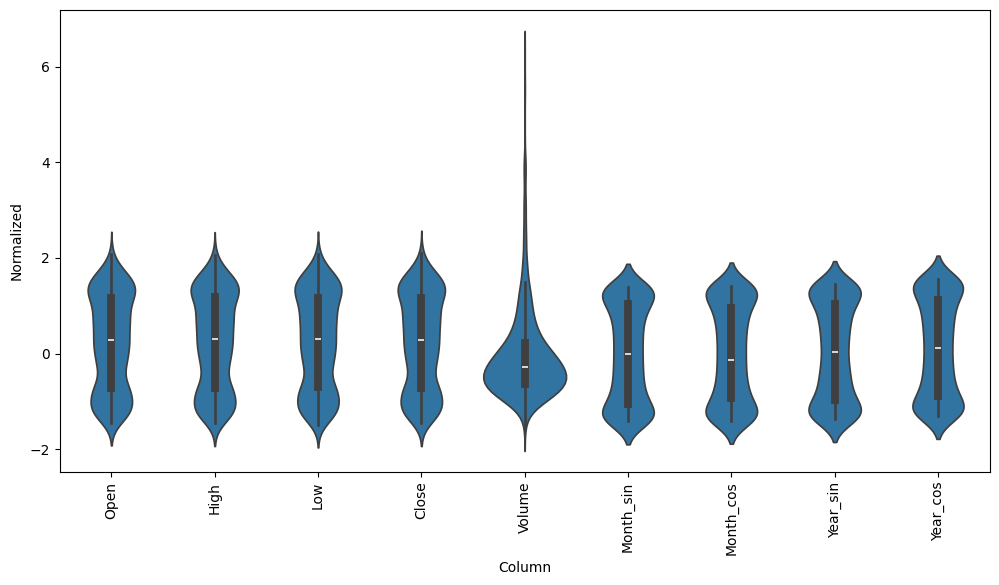

In [28]:
df_std = (g_df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(g_df.keys(), rotation=90)

## Data windowing

### Indexes and offsets

In [53]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [54]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['Close'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['Close']

In [55]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['Close'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['Close']

### Split

In [56]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

WindowGenerator.split_window = split_window

In [57]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 9)
Inputs shape: (3, 6, 9)
Labels shape: (3, 1, 1)


### Plot

In [58]:
w2.example = example_inputs, example_labels

In [59]:
def plot(self, model=None, plot_col='Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
      plt.subplot(max_n, 1, n+1)
      plt.ylabel(f'{plot_col} [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

WindowGenerator.plot = plot

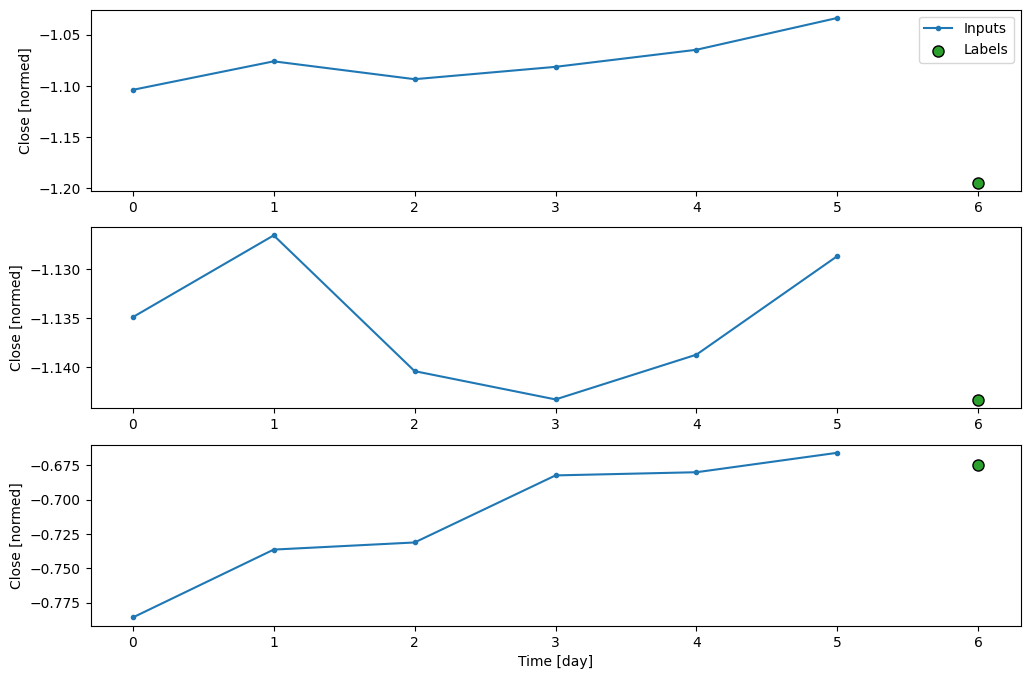

In [60]:
w2.plot()

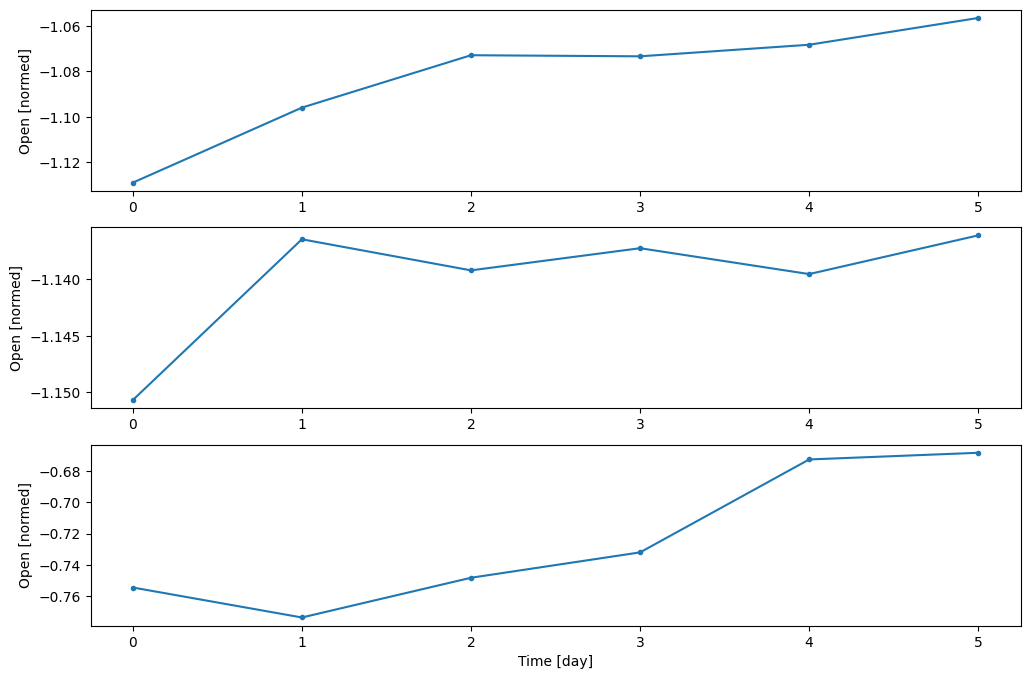

In [61]:
w2.plot(plot_col='Open')

### Create tf.data.Datasets

In [62]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [63]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [64]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 6, 9), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [65]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 9)
Labels shape (batch, time, features): (32, 1, 1)


## Single step models

In [67]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['Close'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Close']

In [68]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 9)
Labels shape (batch, time, features): (32, 1, 1)


### Baseline

Before building a trainable model it would be good to have a performance baseline as a point for comparison with the later more complicated models.

This first task is to predict close price one day into the future, given the current value of all features. The current values include the current close price.

So, start with a model that just returns the current close price as the prediction, predicting "No change". This is a reasonable baseline since close price changes slowly. Of course, this baseline will work less well if you make a prediction further in the future.

In [69]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

Instantiate and evaluate this model:

In [70]:
baseline = Baseline(label_index=column_indices['Close'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val, return_dict=True)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0, return_dict=True)

8/8 [==============================] - 1s 5ms/step - loss: 0.0054 - mean_absolute_error: 0.0552


In [71]:
wide_window = WindowGenerator(
    input_width=30, label_width=30, shift=1,
    label_columns=['Close'])

wide_window

Total window size: 31
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Label column name(s): ['Close']

In [72]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 30, 9)
Output shape: (32, 30, 1)


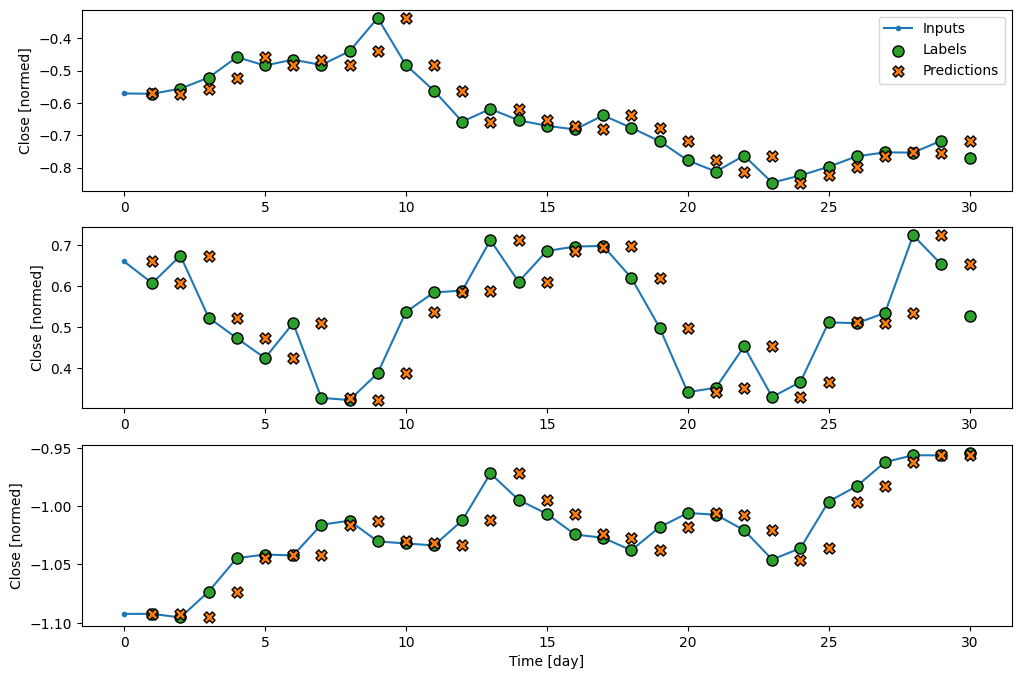

In [73]:
wide_window.plot(baseline)

### Linear model

The simplest trainable model you can apply to this task is to insert linear transformation between the input and output.

In [74]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [75]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 9)
Output shape: (32, 1, 1)


In [76]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [77]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val, return_dict=True)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0, return_dict=True)

Epoch 1/20
28/28 [==============================] - 2s 37ms/step - loss: 0.2458 - mean_absolute_error: 0.4030 - val_loss: 0.2353 - val_mean_absolute_error: 0.4052
Epoch 2/20
28/28 [==============================] - 0s 9ms/step - loss: 0.2023 - mean_absolute_error: 0.3671 - val_loss: 0.1900 - val_mean_absolute_error: 0.3634
Epoch 3/20
28/28 [==============================] - 0s 13ms/step - loss: 0.1670 - mean_absolute_error: 0.3338 - val_loss: 0.1567 - val_mean_absolute_error: 0.3307
Epoch 4/20
28/28 [==============================] - 0s 10ms/step - loss: 0.1378 - mean_absolute_error: 0.3030 - val_loss: 0.1273 - val_mean_absolute_error: 0.2981
Epoch 5/20
28/28 [==============================] - 0s 8ms/step - loss: 0.1130 - mean_absolute_error: 0.2742 - val_loss: 0.1041 - val_mean_absolute_error: 0.2694
Epoch 6/20
28/28 [==============================] - 0s 6ms/step - loss: 0.0926 - mean_absolute_error: 0.2483 - val_loss: 0.0856 - val_mean_absolute_error: 0.2442
Epoch 7/20
28/28 [=======

In [78]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', linear(wide_window.example[0]).shape)

Input shape: (32, 30, 9)
Output shape: (32, 30, 1)


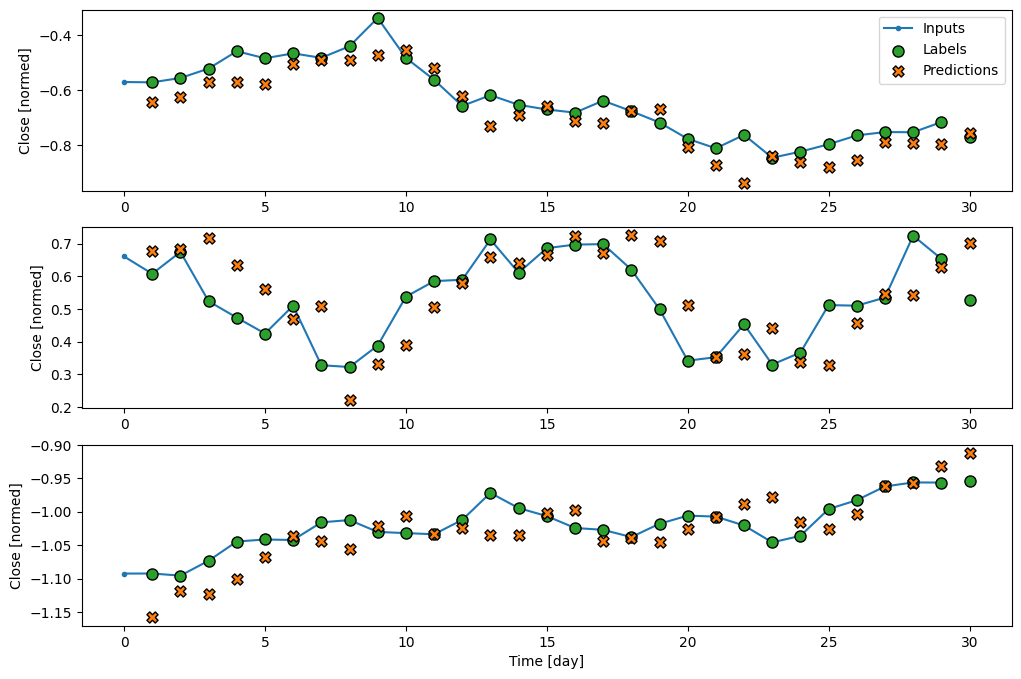

In [79]:
wide_window.plot(linear)

One advantage to linear models is that they're relatively simple to interpret. You can pull out the layer's weights and visualize the weight assigned to each input:

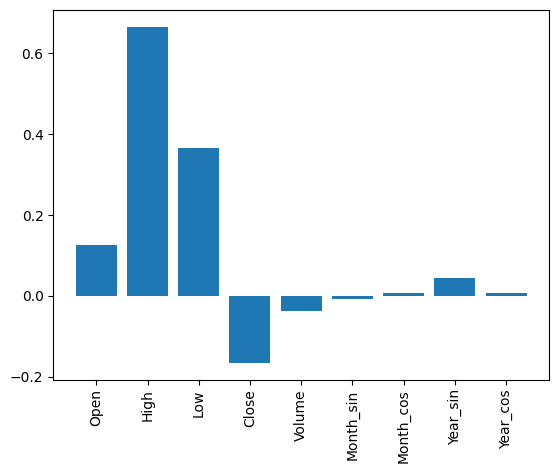

In [80]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

### Dense

Before applying models that actually operate on multiple time-steps, it's worth checking the performance of deeper, more powerful, single input step models.

Here's a model similar to the linear model, except it stacks several a few Dense layers between the input and the output:

In [81]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val, return_dict=True)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0, return_dict=True)

Epoch 1/20
28/28 [==============================] - 4s 24ms/step - loss: 0.2890 - mean_absolute_error: 0.3912 - val_loss: 0.0385 - val_mean_absolute_error: 0.1612
Epoch 2/20
28/28 [==============================] - 0s 6ms/step - loss: 0.0219 - mean_absolute_error: 0.1167 - val_loss: 0.0120 - val_mean_absolute_error: 0.0836
Epoch 3/20
28/28 [==============================] - 0s 7ms/step - loss: 0.0104 - mean_absolute_error: 0.0785 - val_loss: 0.0102 - val_mean_absolute_error: 0.0761
Epoch 4/20
28/28 [==============================] - 0s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0679 - val_loss: 0.0092 - val_mean_absolute_error: 0.0716
Epoch 5/20
28/28 [==============================] - 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0622 - val_loss: 0.0085 - val_mean_absolute_error: 0.0687
Epoch 6/20
28/28 [==============================] - 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0586 - val_loss: 0.0084 - val_mean_absolute_error: 0.0683
Epoch 7/20
28/28 [=========

### Multi-step dense

The baseline, linear and dense models handled each time step independently. Here the model will take multiple time steps as input to produce a single output.

Create a WindowGenerator that will produce batches of three-hour inputs and one-hour labels:

In [82]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['Close'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['Close']

Text(0.5, 0.98, 'Given 3 days of inputs, predict 1 day into the future.')

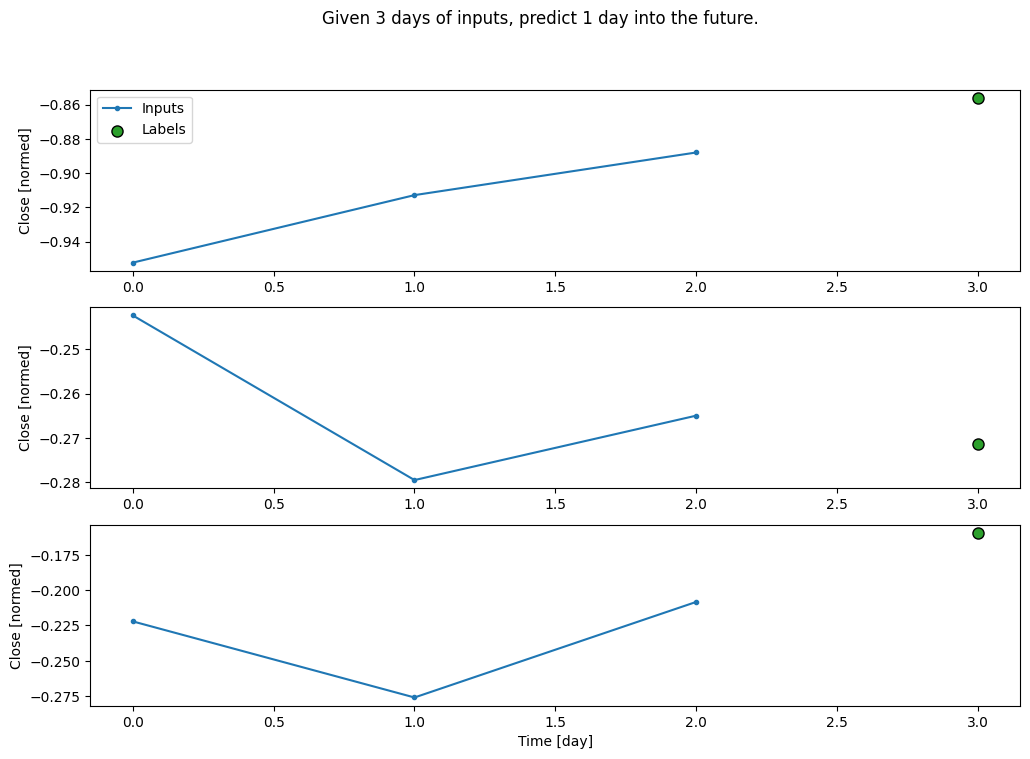

In [83]:
conv_window.plot()
plt.suptitle("Given 3 days of inputs, predict 1 day into the future.")

In [84]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [85]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 9)
Output shape: (32, 1, 1)


In [86]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val, return_dict=True)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0, return_dict=True)

8/8 [==============================] - 0s 2ms/step - loss: 0.0165 - mean_absolute_error: 0.0998


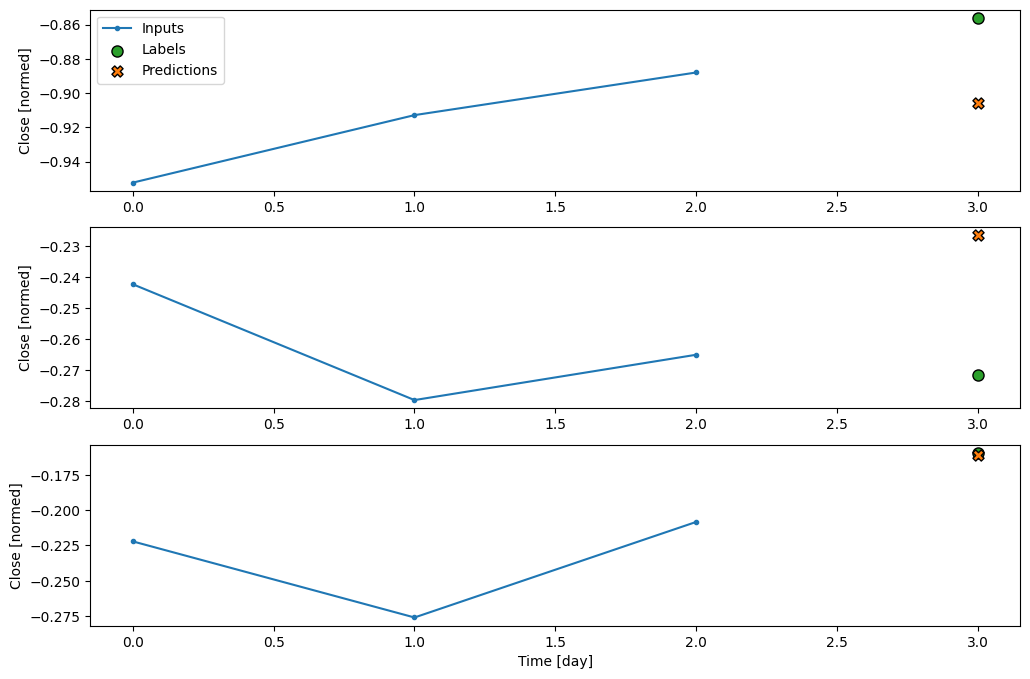

In [87]:
conv_window.plot(multi_step_dense)

The main down-side of this approach is that the resulting model can only be executed on input windows of exactly this shape.

### Convolution neural network

In [89]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [90]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 9)
Output shape: (32, 1, 1)


In [91]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val, return_dict=True)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0, return_dict=True)

8/8 [==============================] - 0s 2ms/step - loss: 0.0121 - mean_absolute_error: 0.0838


In [92]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 30, 9)
Labels shape: (32, 30, 1)
Output shape: (32, 28, 1)


In [93]:
LABEL_WIDTH = 30
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['Close'])

wide_conv_window

Total window size: 33
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32]
Label column name(s): ['Close']

In [94]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 32, 9)
Labels shape: (32, 30, 1)
Output shape: (32, 30, 1)


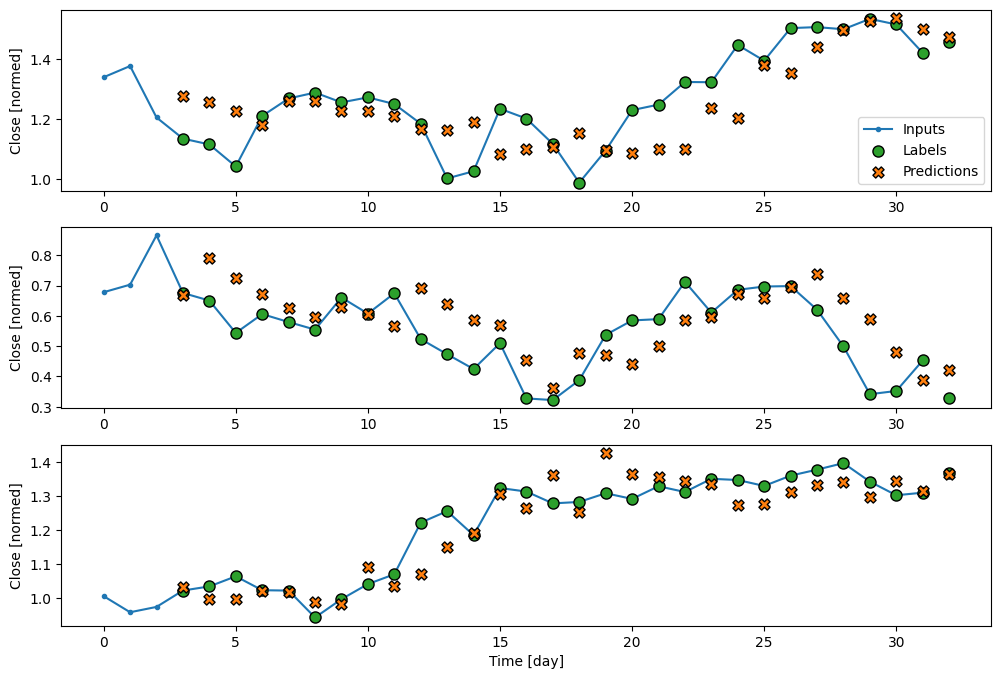

In [95]:
wide_conv_window.plot(conv_model)

### Recurrent neural network

In [96]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

With return_sequences=True, the model can be trained on 30 days of data at a time.

In [97]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 30, 9)
Output shape: (32, 30, 1)


In [98]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val, return_dict=True)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0, return_dict=True)

7/7 [==============================] - 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0763


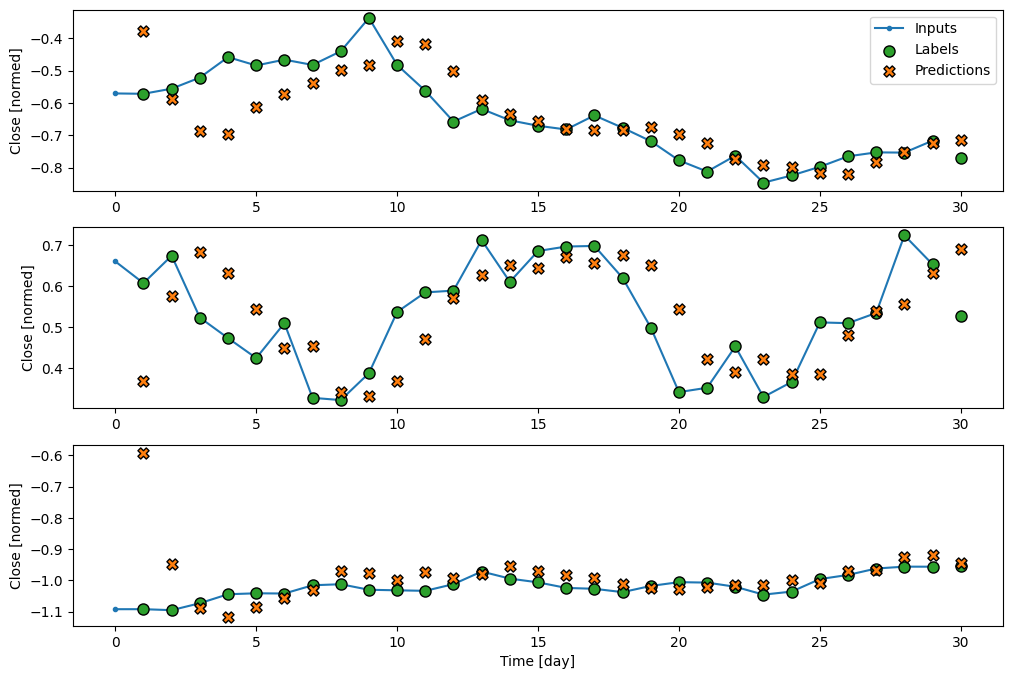

In [99]:
wide_window.plot(lstm_model)

### Performance

In [101]:
val_performance

{'Baseline': {'loss': 0.005426785908639431,
  'mean_absolute_error': 0.05519574508070946},
 'Linear': {'loss': 0.008494975976645947,
  'mean_absolute_error': 0.07331379503011703},
 'Dense': {'loss': 0.0075786118395626545,
  'mean_absolute_error': 0.06675703823566437},
 'Multi step dense': {'loss': 0.016513479873538017,
  'mean_absolute_error': 0.09982358664274216},
 'Conv': {'loss': 0.01214624848216772,
  'mean_absolute_error': 0.08378669619560242},
 'LSTM': {'loss': 0.010252709500491619,
  'mean_absolute_error': 0.07626752555370331}}

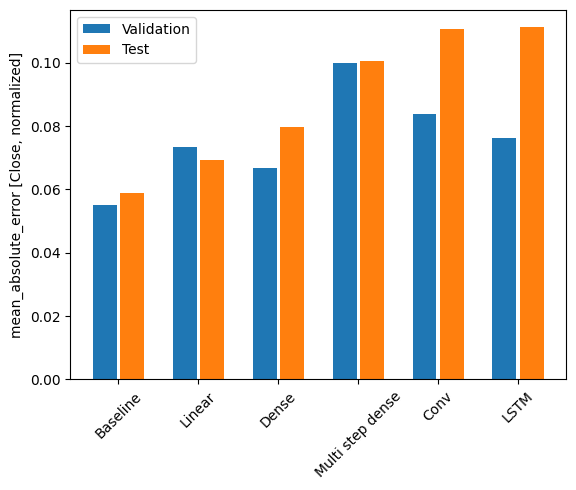

In [102]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
val_mae = [v[metric_name] for v in val_performance.values()]
test_mae = [v[metric_name] for v in performance.values()]

plt.ylabel('mean_absolute_error [Close, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [103]:
for name, value in performance.items():
  print(f'{name:12s}: {value[metric_name]:0.4f}')

Baseline    : 0.0589
Linear      : 0.0693
Dense       : 0.0798
Multi step dense: 0.1007
Conv        : 0.1106
LSTM        : 0.1112


### Multi-output models

The models so far all predicted a single output feature, Close, for a single time step.

All of these models can be converted to predict multiple features just by changing the number of units in the output layer and adjusting the training windows to include all features in the labels (example_labels):

In [104]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=30, label_width=30, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 30, 9)
Labels shape (batch, time, features): (32, 30, 9)


#### Baseline

In [105]:
baseline = Baseline()
baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [106]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val, return_dict=True)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0, return_dict=True)

7/7 [==============================] - 1s 13ms/step - loss: 0.0975 - mean_absolute_error: 0.1472


#### Dense

In [107]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [108]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val, return_dict=True)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0, return_dict=True)

8/8 [==============================] - 0s 3ms/step - loss: 0.0689 - mean_absolute_error: 0.1290


#### RNN

In [109]:
%%time
wide_window = WindowGenerator(
    input_width=30, label_width=30, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val, return_dict=True)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0, return_dict=True)

print()

7/7 [==============================] - 0s 5ms/step - loss: 0.0800 - mean_absolute_error: 0.1492

CPU times: user 19.5 s, sys: 1.02 s, total: 20.6 s
Wall time: 19.3 s


#### Advanced: Residual connections

The Baseline model from earlier took advantage of the fact that the sequence doesn't change drastically from time step to time step. Every model trained in this project so far was randomly initialized, and then had to learn that the output is a a small change from the previous time step.

While you can get around this issue with careful initialization, it's simpler to build this into the model structure.

It's common in time series analysis to build models that instead of predicting the next value, predict how the value will change in the next time step. Similarly, residual networks—or ResNets—in deep learning refer to architectures where each layer adds to the model's accumulating result.

In [110]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each time step is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [111]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small.
        # Therefore, initialize the output layer with zeros.
        kernel_initializer=tf.initializers.zeros())
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val, return_dict=True)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0, return_dict=True)
print()

7/7 [==============================] - 0s 15ms/step - loss: 0.0651 - mean_absolute_error: 0.1117

CPU times: user 10.8 s, sys: 436 ms, total: 11.2 s
Wall time: 18.5 s


#### Performance

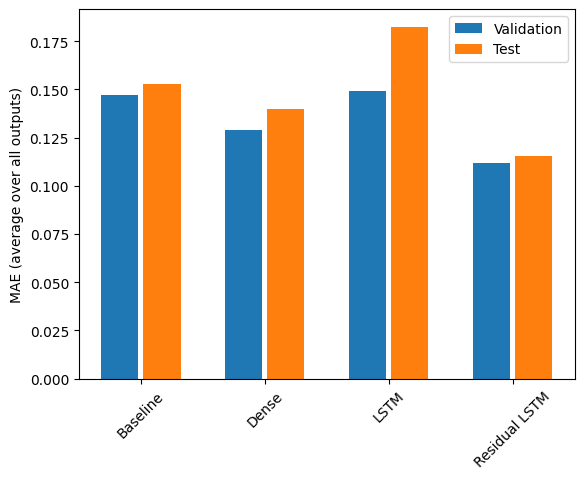

In [112]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
val_mae = [v[metric_name] for v in val_performance.values()]
test_mae = [v[metric_name] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [113]:
for name, value in performance.items():
  print(f'{name:15s}: {value[metric_name]:0.4f}')

Baseline       : 0.1525
Dense          : 0.1397
LSTM           : 0.1825
Residual LSTM  : 0.1156


## Multi-step models

Both the single-output and multiple-output models in the previous sections made single time step predictions, one hour into the future.

This section looks at how to expand these models to make multiple time step predictions.

In a multi-step prediction, the model needs to learn to predict a range of future values. Thus, unlike a single step model, where only a single future point is predicted, a multi-step model predicts a sequence of the future values.

Total window size: 60
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Label column name(s): None

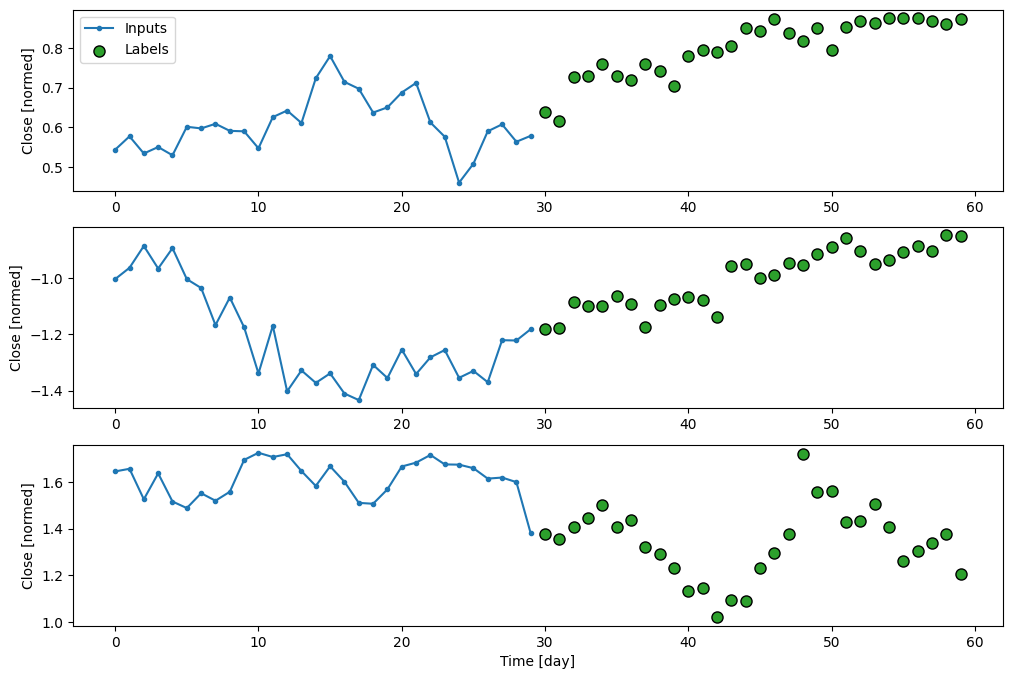

In [114]:
OUT_STEPS = 30
multi_window = WindowGenerator(input_width=30,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

### Baselines

7/7 [==============================] - 0s 3ms/step - loss: 0.6672 - mean_absolute_error: 0.5074


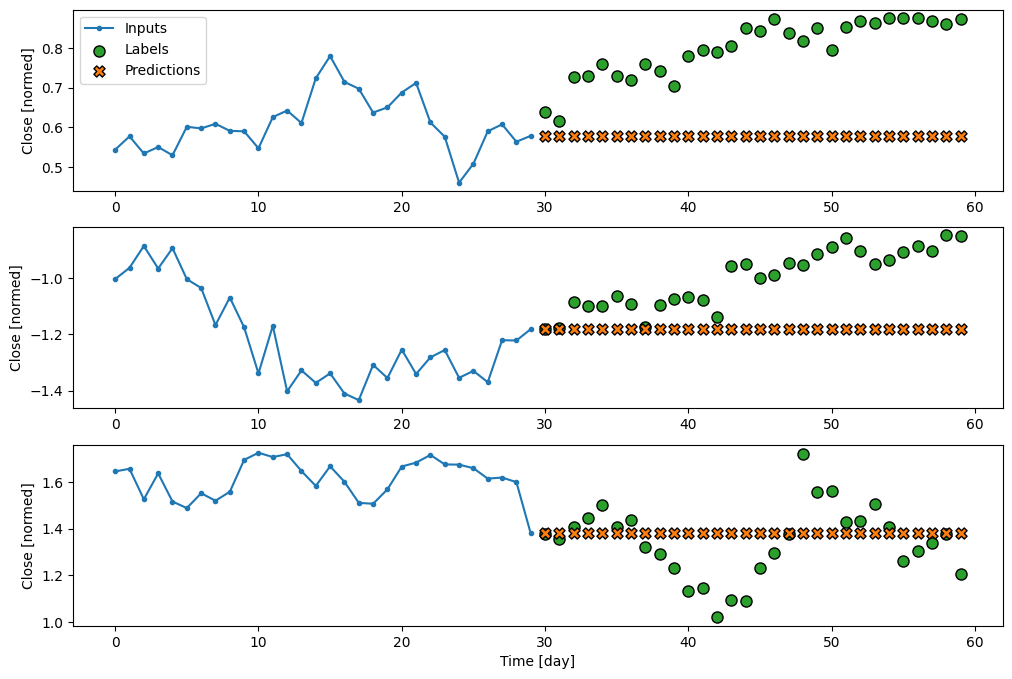

In [115]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val, return_dict=True)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(last_baseline)

Since this task is to predict 30 days into the future, given 30 days of the past, another simple approach is to repeat the previous day, assuming tomorrow will be similar:

7/7 [==============================] - 1s 5ms/step - loss: 1.2007 - mean_absolute_error: 0.7584


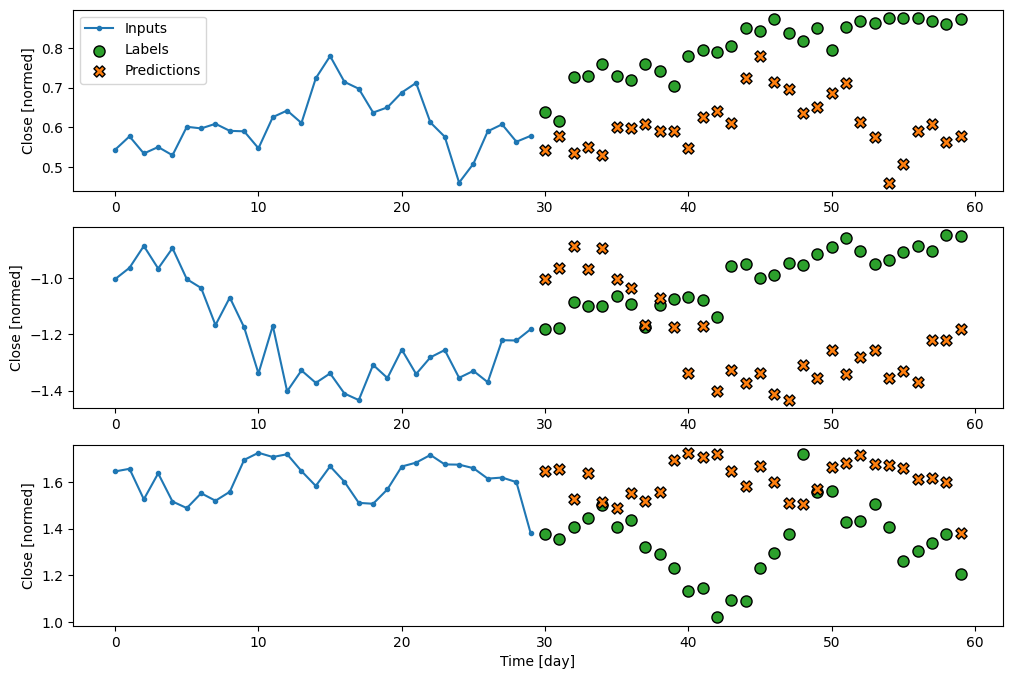

In [116]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                        metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val, return_dict=True)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(repeat_baseline)

## Single-shot models

One high-level approach to this problem is to use a "single-shot" model, where the model makes the entire sequence prediction in a single step.

### Linear

7/7 [==============================] - 0s 3ms/step - loss: 0.2150 - mean_absolute_error: 0.3483


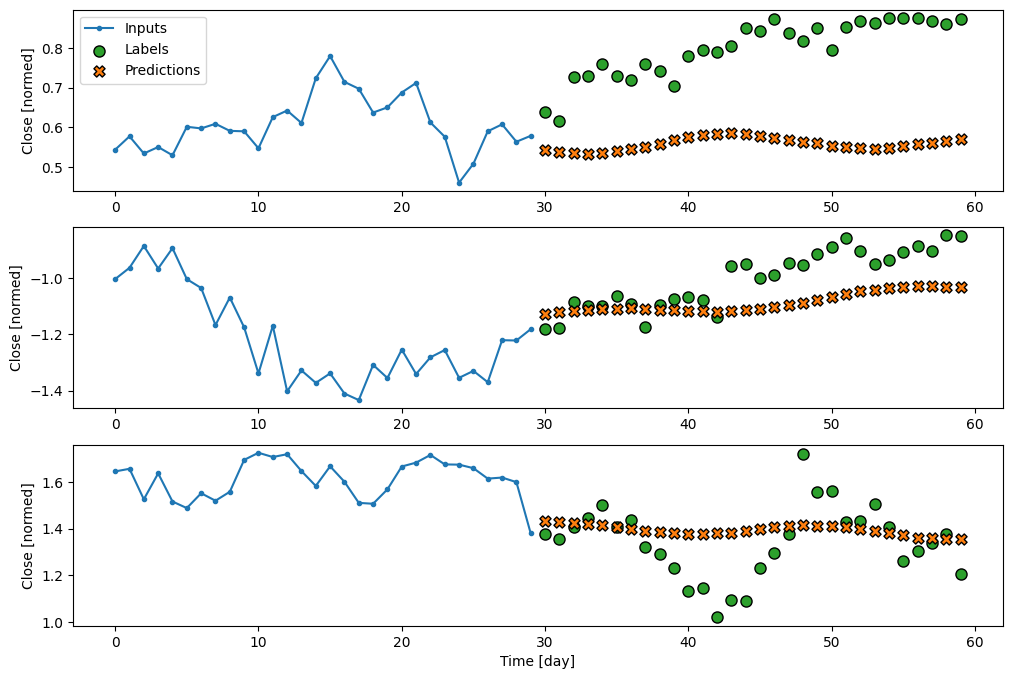

In [117]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val, return_dict=True)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_linear_model)

### Dense

7/7 [==============================] - 0s 5ms/step - loss: 0.1186 - mean_absolute_error: 0.2013


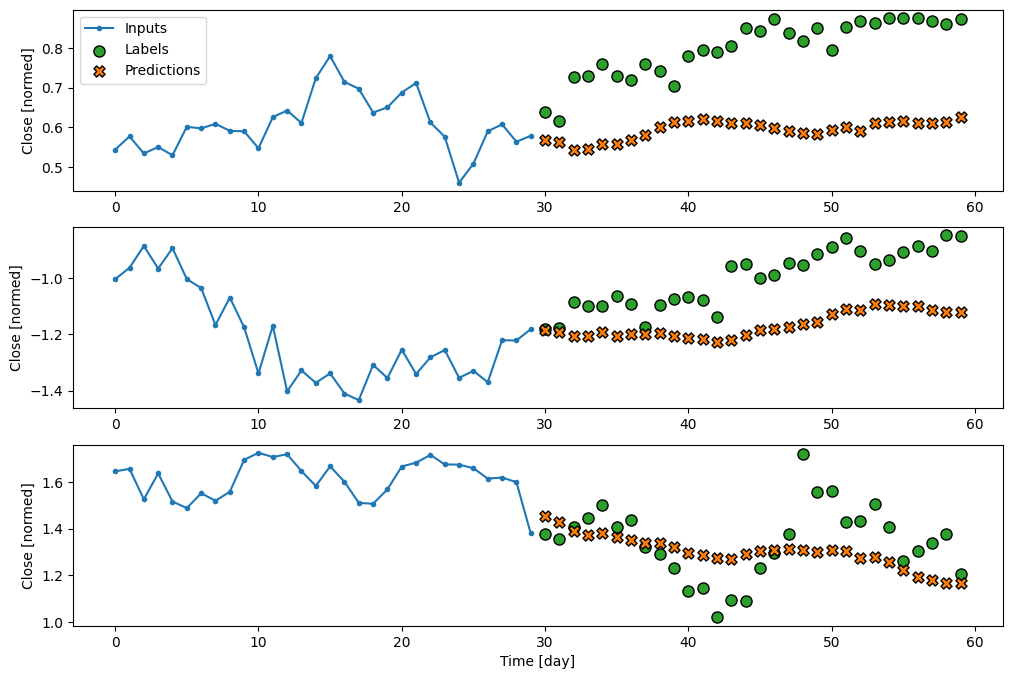

In [118]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val, return_dict=True)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_dense_model)

### CNN

7/7 [==============================] - 0s 5ms/step - loss: 0.1156 - mean_absolute_error: 0.1970


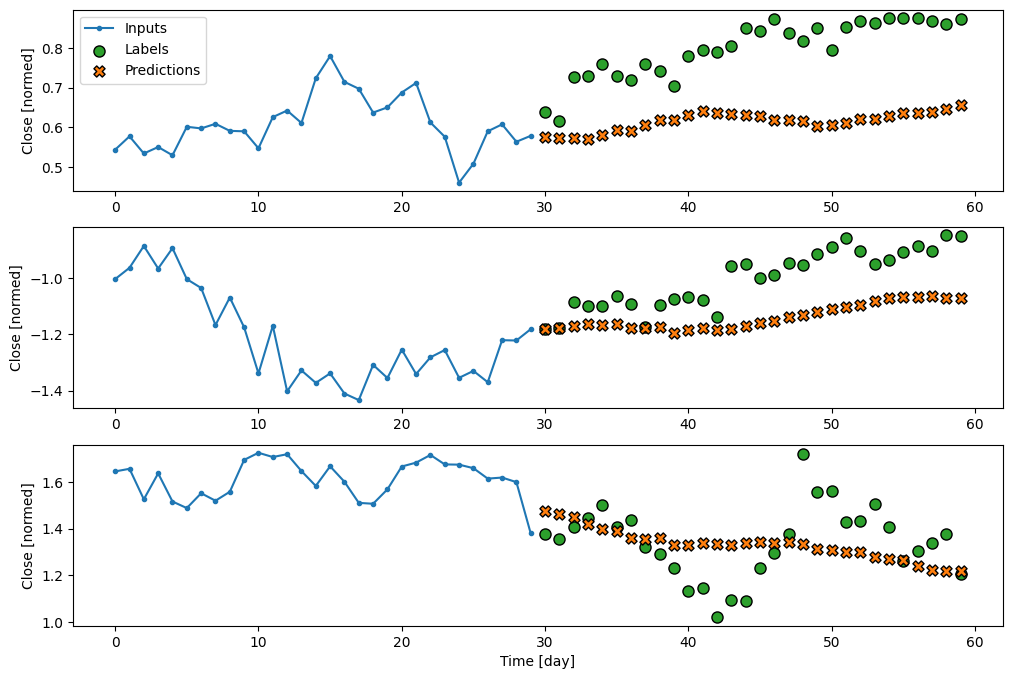

In [119]:
ONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val, return_dict=True)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_conv_model)

### RNN

A recurrent model can learn to use a long history of inputs, if it's relevant to the predictions the model is making. Here the model will accumulate internal state for 30 days, before making a single prediction for the next 30 days.

7/7 [==============================] - 0s 6ms/step - loss: 0.1151 - mean_absolute_error: 0.2090


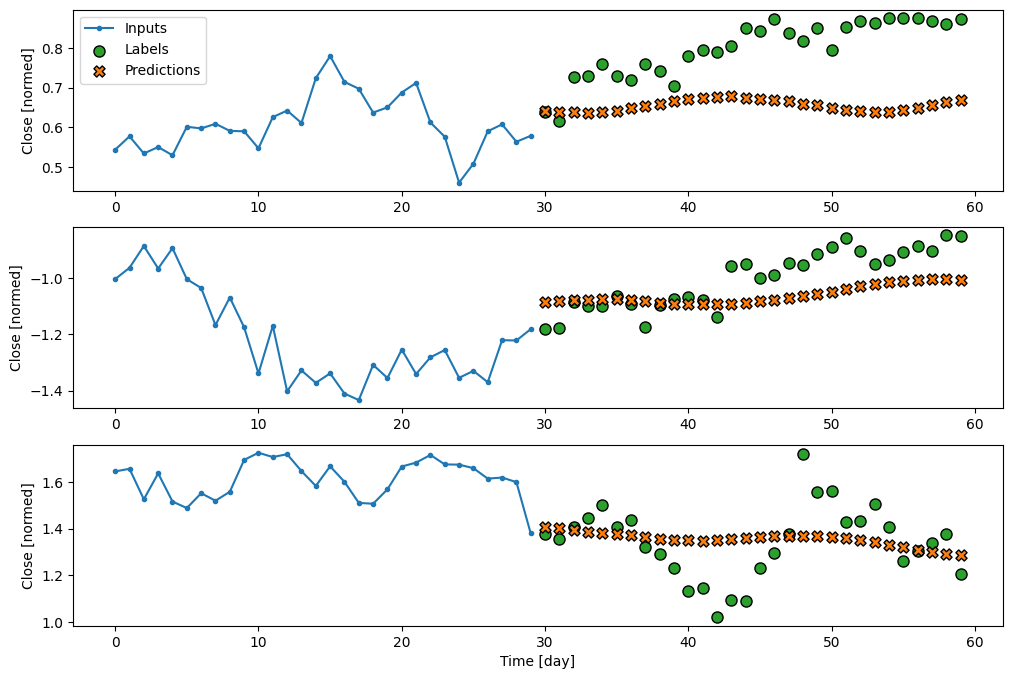

In [120]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val, return_dict=True)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_lstm_model)

## Advanced: Autoregressive model

In [121]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [122]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [123]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [124]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 9])

In [125]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [126]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 30, 9)


7/7 [==============================] - 0s 7ms/step - loss: 0.1112 - mean_absolute_error: 0.1988


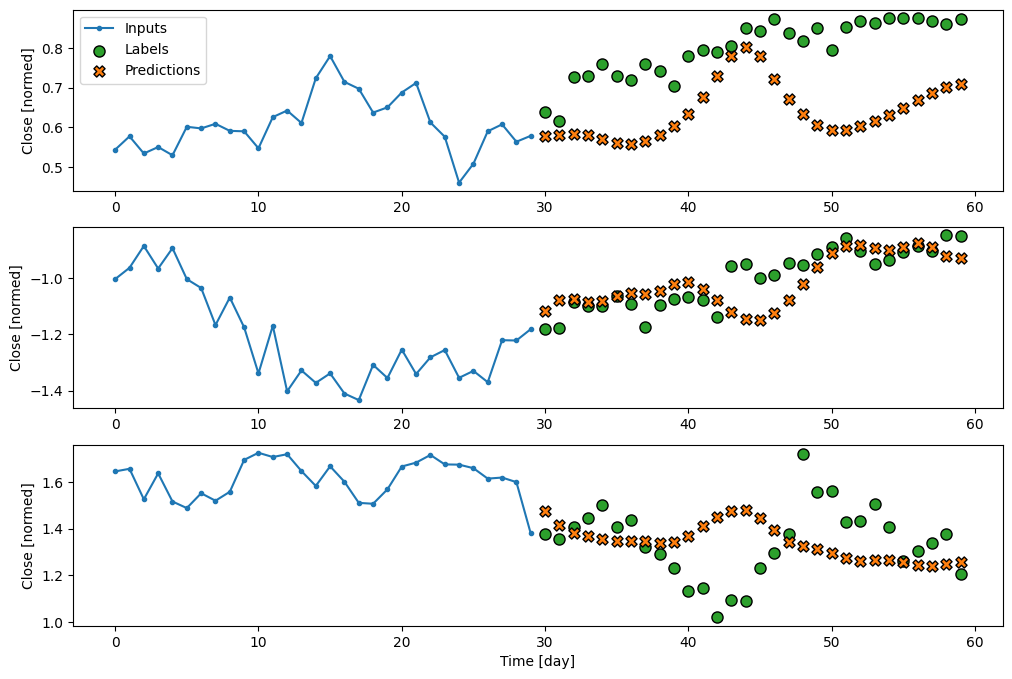

In [127]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val, return_dict=True)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(feedback_model)

### Performance

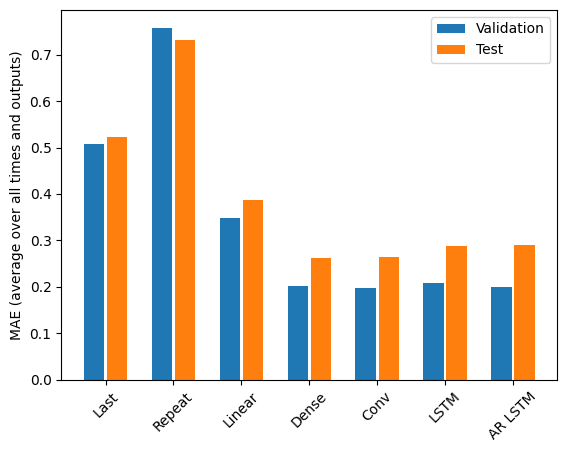

In [128]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_absolute_error'
val_mae = [v[metric_name] for v in multi_val_performance.values()]
test_mae = [v[metric_name] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [129]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[metric_name]:0.4f}')

Last    : 0.5220
Repeat  : 0.7319
Linear  : 0.3869
Dense   : 0.2630
Conv    : 0.2635
LSTM    : 0.2885
AR LSTM : 0.2901
